<a href="https://colab.research.google.com/github/thecrazyphysicist369/Amnesic-Flooding/blob/main/Amnesiac_with_BFS_hops.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing all the necessary libraries

In [ ]:
#Importing all the necessary libraries
import matplotlib.pyplot as plt
import networkx as nx
import random
import numpy as np
import time
import math
from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import pandas as pd

#Preparing the Model and Functions

##Creating individuals

Each node represent one individual(person).
Generating nodes with their distinct properties.The attributes of each node are:


1. Distinct identification number (index)
2. Set of neighbouring nodes  
3. Memory storing set of messages generated/recieved 
4. A node may or may not be generator
5. The generator nodes will store the message they created 
6. Storing the messages recieved in the current round


In [ ]:
'''
vertex generator generates each individual with their properties
'''

def gen_vertex(n,percent):
    ver_list=[]
    c=0

    for i in range(n):
      vertex = {
                'index': c, 			# the unique index of th individual
                'connected': [] ,  # the small world connections between the individuals
                'memory': [],     #stores informtion generated (in case of message generting nodes) and information received 
                'generator' : random.randint(0,percent) ,    #the node may be generator 
                'mymsg':'0',     #if generator, then the messages generated by those nodes will be listed
                'cur_msg':[]     #storing messages received in the current iteration
                }
      ver_list.append(vertex)
      c+=1
    return ver_list

##Generating the Population
####A WS-Small world network is created with user input of:


*   **n** = *Number of individuals in the population. This is similar to the number of nodes in the small world network*.
*   **k** = *Number of nearest-neighbours. The number of nodes connected to each node in the small world network.*
*   **p** = *Probability of the length of connection between the nodes of the small world network.*

As in a social media network, every individual doesn't create content but forward content received from other individuals. The number of creators are a percent of the population. This is why we included percent as a parameter in the small world.


*   **percent** = *The percent of the total population which generates new information*


In [ ]:
'''
Generating the Small World Network
'''

def gen_graph(n, k, p,percent):
   population = gen_vertex(n,percent)   #list of nodes in the small world network
   G = nx.watts_strogatz_graph(n, k, p, seed=10)    #connecting the  nodes with the defined parameters 
   neighbor = []    #empty list 
   for node in list(sorted(G.nodes())):
   	neighbours = list(nx.all_neighbors(G, node))     #using WS network the network is formed
   	neighbor.append(neighbours)       # we have the list of neighbours among whom the nodes share messages 
   for i in range(n): #*
     population[i]['connected'] = neighbor[i] 
     population[i]['index'] = int(i) 
     population[i]['node_sharability'] = random.randint(0,k) 
   return population

##Creating the  information pool
The message generating nodes will choose messages from this information pool

In [ ]:
'''

This function generates and returns a list of msgs of strings. 
It takes different characters as input and form different combinations.
Each distinct combination represent a distinct message .

'''

def msgList():
  list1=[]
  for i in range(60,123) :
    for j in range(60,123) :
      p=chr(i)+chr(j)  # creating comnbinations  
      list1.append(p)  #generating the list
  return list1



##Message Generation
The message generation function selects nodes from the population. If the node is a generator node then the function helps the node to generate unique messages from the message list.

*   **Population** = *The vertex list returned by the gen_graph() function.*

The fucntion returns a dictionary of all the generator nodes.

In [ ]:
'''
this function randomly chooses from the list of msg and assigns it to one of the nodes that are generators 
'''
def  msgGeneration(population):
  dict={}
  list1=msgList()
  for i in population:
    if(i['generator']==1 ):   # if in message generation a node has generator attribute as 1 ,then it is considered as generator
      l=random.randint(0,len(list1)-1)     # generator choosing a message from the informtaion pool randomly
      dict[list1[l]]=0  
      i['mymsg']=list1[l]   #the generators will have the message or messsages generated by them
      list1.pop(l)    # deleting the chosen information from the information pool to maintain uniqueness of the messages 
  #print(len(list1))
  return dict


#population



#Plotting different parameters.
1. x is an array that contains the parametric values of x-axis.
2. y is an array that contains the parametric values of y-axis.
3. x_name contains the name of the parameter of x-axis.
4. y_name is the name of the parameter of in y-axis.

In [ ]:
def plotXY(x,y,x_name,y_name):
  plt.figure(figsize=(10,6))
  plt.plot(x, y)
  plt.xlabel(x_name)
  plt.ylabel(y_name)
  
  plt.show()

##Message Passing or Hop
* Message passing from the perspective of the nodes

* Hops from the perspective of the messages

It defines the message being sent or transfered from one node to another.



In [ ]:
def msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,el,next,sharability):
  total=0
  for adj in population[el]['connected']:
    flag=0
    deliver=random.randint(1,sharability)
    #deliver=1
    if(deliver==1):
      if(msg in population[adj]['memory']):
       # print(msg,adj)
        population[adj]['memory'].remove(msg)
        population[adj]['memory'].append(msg)
        continue
      else:
        if(len(population[adj]['memory'])>=k):
          if(population[adj]['generator']!=1):
            population[adj]['memory'].pop(0)
            
          else:
            population[adj]['memory'].pop(1)
          population[adj]['memory'].append(msg)
          dict[msg]+=1
          flag=1
          total+=1
        else:
          population[adj]['memory'].append(msg)
          dict[msg]+=1
          flag=1
          total+=1
      if(flag==1):
        if(adj not in next):
          next.append(adj)
    else:
      continue
  
  return total

#Total Hops per iteration vs Iteration

In [ ]:
def totalHopsPerIteration_Calc(population,k,dict,iter,sharability):
  g=0
  x=[]
  y=[]
  next=[]
  cur=[]
  total=0
  for node in population:
    #print("here")
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
      next.append(node['index'])
  iteration=1
  while(iteration<=iter):
    #if(iteration%2==0):
     # print(iteration)
    cur=next
    next=[]
    if(len(cur)==0):
      print(iteration)
      break
    for el in cur:
      for msg in population[el]['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,el,next,sharability) 
        #print(total)
    
    x.append(iteration)
    y.append(total) 
    total=0
    #print(total)          
    #print(iteration)
    iteration+=1
  plotXY(x,y,"Iterations","Total Hops per iteration") 
  print(total)
  return (total) 

def Simulation_totalHops_Per_Iteration(no_nodes,no_of_connected_components,p,percent,iter,mem,sharability):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  print("Size of memory= ",mem)
  print("Total iterations= ",iter)
  print("Sharability is =",(100/sharability),"%")
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("no of msgs",g)
  totalHopsPerIteration_Calc(population,mem,dict,iter,sharability)
  print(dict)
  #return population

#Observations

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 100.0 %
no of msgs 25


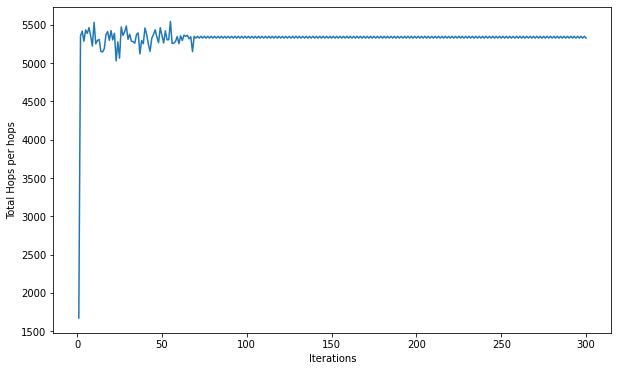

0
{'R?': 128245, '?g': 128245, 'C]': 128259, ']?': 128258, '[p': 128244, 'T<': 128244, 'F<': 128244, 'mF': 128244, '=G': 96048, 'pX': 128245, 'fK': 37713, 'Y?': 33700, 'IY': 24998, 'eA': 38052, 'i<': 8636, '_m': 21310, 'bl': 19058, 'HT': 11937, '_d': 10593, 'Q<': 14275, '_U': 21103, 'Zb': 44040, 'tV': 7302, 'eZ': 41405, 'QA': 12137}
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 24


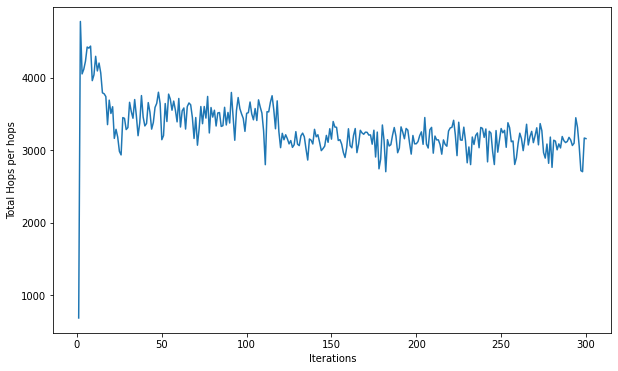

0
{'>e': 68130, 'L^': 66639, 'gx': 68048, 'Ia': 1833, 'iP': 1079, 'Ct': 68305, 'oT': 67550, 'jo': 67719, 'Tk': 68003, 'DH': 66926, 'Mc': 68083, 'FT': 287, 'ss': 67695, 'uw': 3499, 'M=': 26106, 'xu': 68214, 'LW': 68762, 'Li': 17, 'Aa': 67273, '\\Z': 2496, 'mM': 68823, 'ns': 56, 'Qo': 122, 'Wn': 2300}
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 33.333333333333336 %
no of msgs 30


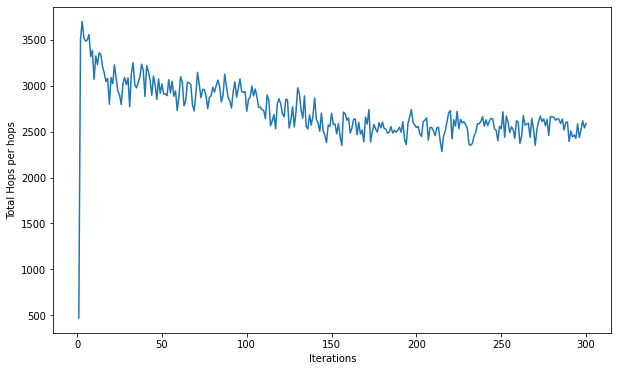

0
{'Zt': 48163, '^x': 48342, 'ZV': 1116, 'AJ': 711, '@X': 47844, 'kK': 16056, 'qD': 48282, 'EV': 47282, 'wM': 47790, '^p': 6350, '=]': 47417, '=j': 48735, 'Ht': 317, 'aH': 62, 'rw': 23253, 'DV': 1438, 'x?': 308, 'wF': 2452, 'Kz': 46686, 'zW': 47294, 'Wu': 46399, 'cf': 48108, '`X': 959, 'w>': 47787, 'Kx': 48093, 'Nx': 787, 'Gq': 48789, 'Uq': 24, '=l': 47839, 'mb': 162}
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 25.0 %
no of msgs 20


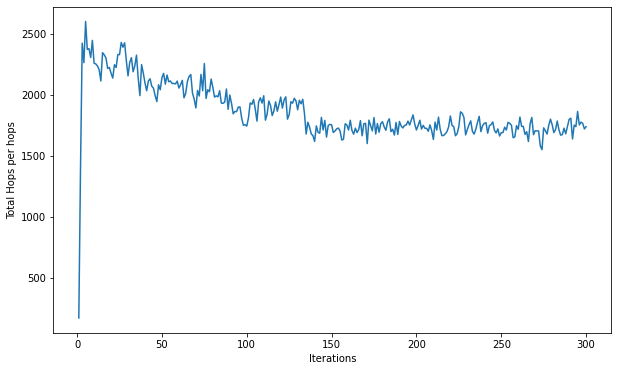

0
{'be': 35453, 'Tv': 35356, 'g`': 34744, 'gR': 34532, 'k\\': 34452, 'Zt': 3280, 'Hr': 34341, 'Y?': 34874, 'S[': 9658, 'Mp': 16013, 'nj': 1018, 'tx': 35567, 'j_': 34513, 'FU': 35474, 'vb': 35084, ']G': 35572, 'hw': 4550, 'Ud': 35307, '@s': 35226, 'dv': 35330}
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 20.0 %
no of msgs 21


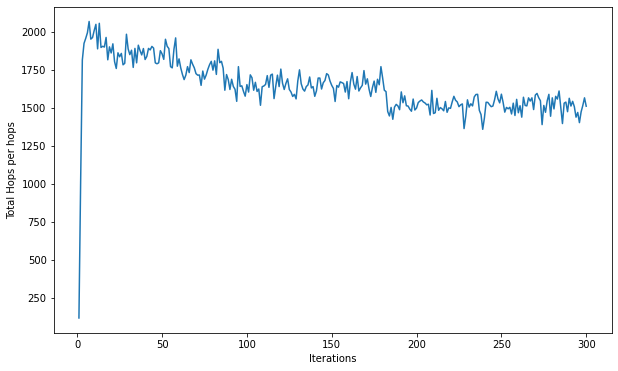

0
{'re': 5620, 'h@': 28810, 'Na': 28703, '<L': 8305, 'wn': 28792, 'eO': 28894, '[c': 28416, 'sA': 28952, 'TH': 28698, 'fR': 28934, '\\_': 28560, 'AL': 28751, 'gf': 28520, 'Ll': 28862, 'op': 28716, '_D': 570, '@m': 28257, 's[': 28816, 'tq': 28567, '\\O': 17566, 'mh': 1205}
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 16.666666666666668 %
no of msgs 27


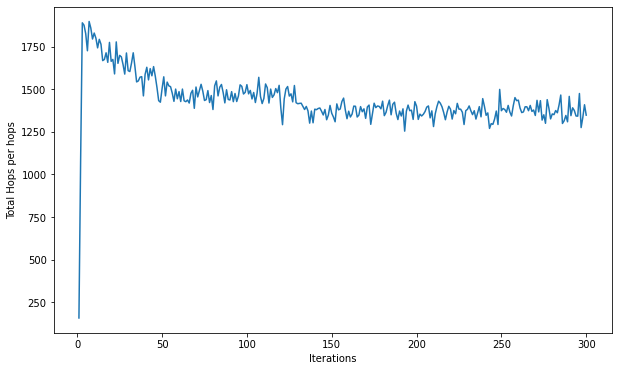

0
{'hL': 2764, 'Rw': 24357, 'DO': 24423, 'Hc': 24057, 'uV': 23953, 'u`': 23946, ']y': 24219, 'oW': 23979, 'At': 24377, 'ew': 24202, '?l': 24420, '_c': 24189, 'dW': 118, 'FX': 23997, 'ce': 24353, 'PB': 1050, 'ug': 20, 'Ib': 10015, 'zU': 24013, '@j': 173, 'w^': 24035, 'yc': 312, 'jj': 587, '>]': 2056, 'xa': 3930, 'Tu': 24296, '\\L': 24185}
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 14.285714285714286 %
no of msgs 23


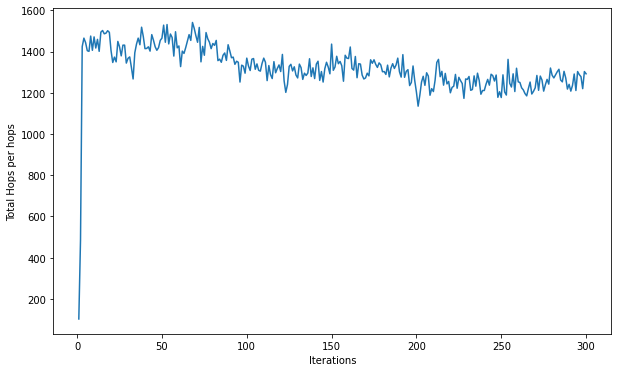

0
{'C?': 20764, 'TZ': 20554, '\\C': 21085, 'ph': 20586, 'vd': 20968, 'wd': 20782, 'Cn': 13178, 'Bz': 20513, 'vF': 5353, ']?': 20206, 'dQ': 21106, 'nk': 5977, 'hQ': 94, 'B`': 8, 'db': 20438, 'K?': 20356, 'tN': 20539, 'Sr': 20129, '\\?': 20617, 'Qa': 21050, '=W': 20678, 'ZR': 20590, 'se': 20797}
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 12.5 %
no of msgs 25


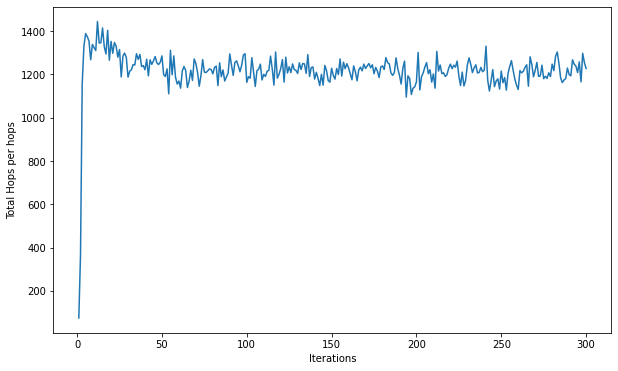

0
{'nF': 18162, '<]': 17797, 'uZ': 577, 'Ut': 18260, 'WG': 2873, 'W@': 18232, 'Ja': 18197, 'N]': 18628, 'Uu': 14, 'RO': 34, 'ym': 17822, 'Ck': 17689, 'S?': 18418, '[a': 18185, 'LL': 18153, 'Fy': 17289, 'Zo': 17546, '>Z': 18031, 'UP': 17675, 'ab': 17628, 'k[': 18253, '[M': 18097, 'Hl': 1355, 'JT': 18315, '>t': 18228}
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 11.11111111111111 %
no of msgs 20


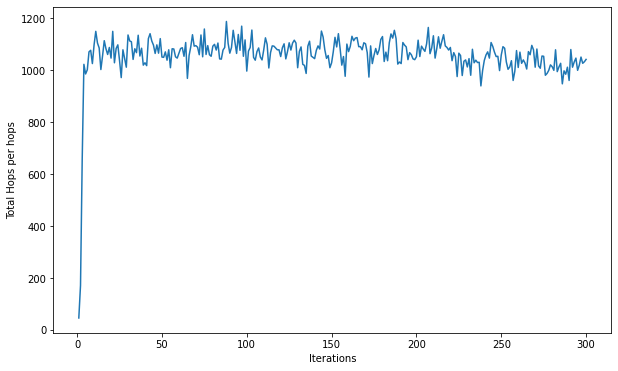

0
{'Md': 15895, 'se': 16197, 'tY': 11854, 'qv': 16409, 'Oy': 16100, 'Er': 16046, 'uY': 16114, '<T': 16219, 'gB': 16205, 'nU': 15936, 'ge': 16360, 'FQ': 16029, 'xr': 15585, 'Px': 15900, 'wR': 15967, ']U': 16315, '\\S': 15885, 'Nv': 15871, ']r': 16242, 'iE': 15911}
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 10.0 %
no of msgs 23


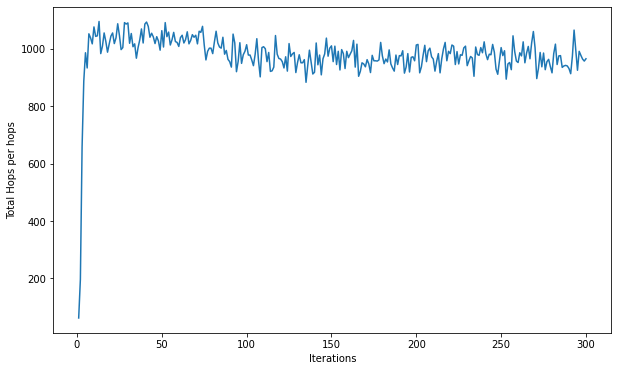

0
{'Zh': 14450, '^M': 14522, '>?': 14285, 'Ky': 14201, 'vz': 14430, 'n=': 13554, 'dh': 14704, 'eW': 14229, 'Gc': 14118, 'QP': 14608, '[R': 14282, 'IS': 13857, 'hd': 14286, 'PX': 3321, 'Qn': 14297, 'm<': 4154, 'jm': 14662, 'En': 14245, 'ho': 14617, 'v_': 14112, 'JH': 14252, 'LI': 14, '<O': 14567}
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 9.090909090909092 %
no of msgs 31


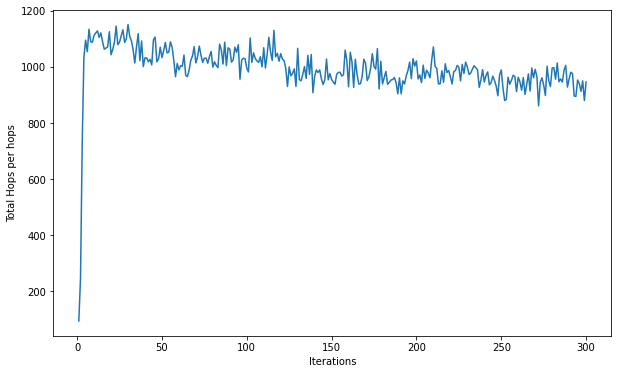

0
{'VH': 11900, 'PO': 12981, 'Q\\': 231, 'Jd': 12291, 'Td': 1235, 'oK': 5366, 'Hg': 12701, 'cD': 12610, 'nI': 13146, 'aM': 1500, 'Aj': 1096, 'gA': 12213, 'w[': 12280, 'fg': 12075, 'sV': 9585, 'HW': 12207, 'aE': 12854, 'kh': 12639, 'SJ': 12463, 'hX': 12855, 'yZ': 12582, 'gd': 12479, 'Fo': 12087, 'T_': 97, '\\O': 13243, 'zK': 103, 'qZ': 12559, 'DI': 12856, 'NX': 4576, 'qi': 11505, '<U': 12042}


In [ ]:
for sharability in range(1,12): ##keeping all other factors constant and slowly decreasing sharability %
  Simulation_totalHops_Per_Iteration(100,20,0.5,3,300,10,sharability)

No of nodes=  100
Nearest neighbours=  2
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 29
21


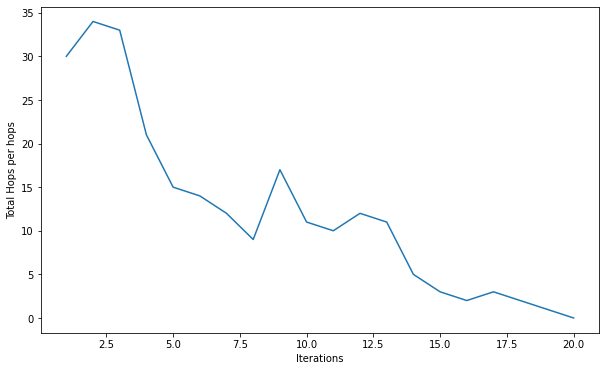

0
{'cx': 15, 'iP': 19, '`>': 0, 'jw': 9, 'Bb': 12, 'Oi': 17, 'RR': 4, 'DY': 3, 'Zv': 37, 'ta': 4, 'ZY': 0, 'fq': 10, 'Qn': 13, 'ie': 6, 'Th': 3, 'O_': 1, 'YT': 12, '_v': 0, '`x': 30, '?n': 0, 'Ua': 5, 'ya': 9, '?K': 10, '`O': 1, '`C': 1, '\\J': 7, 'Xo': 4, 'MQ': 2, 'DL': 11}
No of nodes=  100
Nearest neighbours=  3
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 26
30


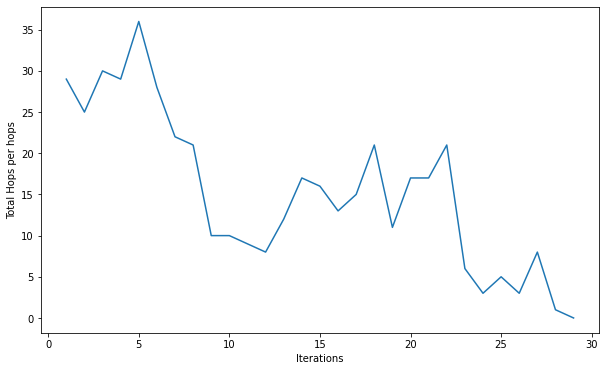

0
{'=c': 21, '<^': 9, '_e': 3, 'X@': 17, '@C': 33, 'Jm': 21, 'uq': 39, 'Ba': 1, 'qj': 0, 'zo': 12, 'ok': 5, 'VN': 36, 'p]': 38, 'I@': 15, 'nC': 2, 'qY': 7, 'XD': 24, 'ly': 3, 'vM': 12, 'Et': 1, '^^': 14, 'Rd': 19, 'Jk': 46, 'KC': 7, 'Ll': 46, 'P]': 12}
No of nodes=  100
Nearest neighbours=  4
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 29


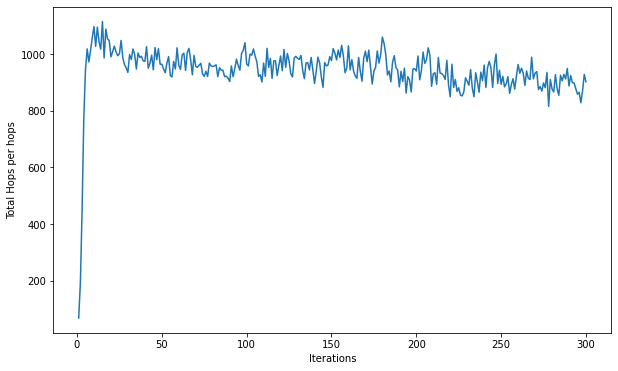

0
{'x<': 13300, 'Yt': 11862, 'yu': 13714, 'pF': 26, '<J': 13984, 'wX': 16, 'zi': 13015, '`j': 13526, 'mw': 103, 'sL': 13940, 'DB': 180, 'H]': 13320, '>l': 13616, 'G?': 1515, 'oP': 13469, 'V\\': 14019, 'C[': 13807, 'Vu': 13443, 'Yj': 13976, 'MT': 125, '<@': 12425, '[[': 13439, 'xa': 13138, 'Iw': 12834, 'RG': 13897, 'GQ': 420, 'A`': 2066, 'tP': 10123, 'tI': 13596}
No of nodes=  100
Nearest neighbours=  5
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 30


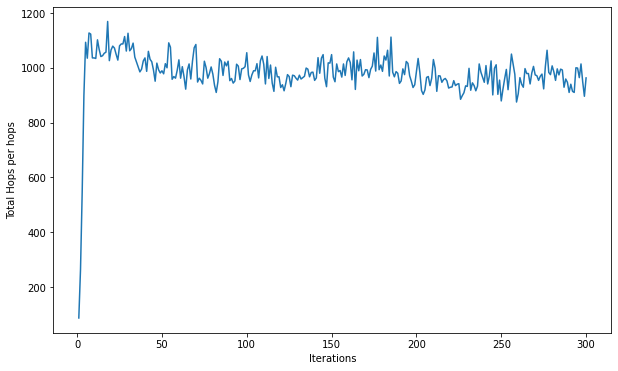

0
{'<a': 12370, 'Vv': 8186, 'Xy': 13404, 'dZ': 13022, '__': 1004, 'Xc': 13686, 'qa': 13689, 'Nj': 13009, 'fI': 12926, 'Ij': 11967, '\\M': 20, 'kw': 1010, 'ND': 1268, 'EP': 13389, 'iU': 14134, 'Pb': 2091, 'og': 101, '[m': 13679, 'Oi': 13671, 'vo': 13383, 'xB': 13992, 'kO': 13731, 'Qe': 12914, '==': 14184, 'VZ': 220, '@G': 92, 'br': 11908, 'Bx': 14055, 'ld': 12679, 'gH': 14335}
No of nodes=  100
Nearest neighbours=  6
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 21


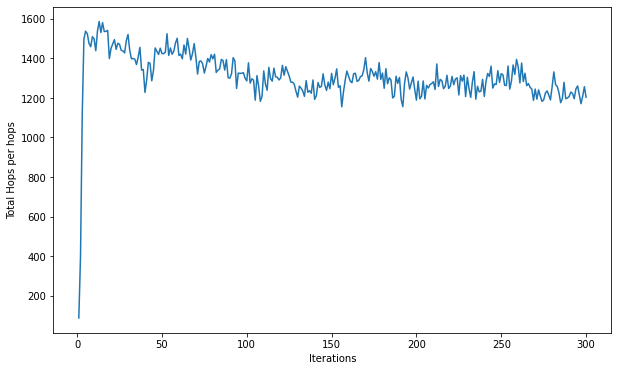

0
{'Wc': 379, 'Rs': 22108, 'dq': 4993, 'sB': 22781, 'eQ': 22848, 'wK': 22253, 'pO': 22894, 'To': 1532, 'HS': 22488, 'Vl': 19934, '`D': 22487, 'T\\': 22087, 'Ub': 22721, 'yZ': 22619, 'WK': 6679, 'MN': 22883, 'Mc': 21886, 'da': 22237, 'jo': 22158, 'dR': 22492, '[v': 22900}
No of nodes=  100
Nearest neighbours=  7
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 21


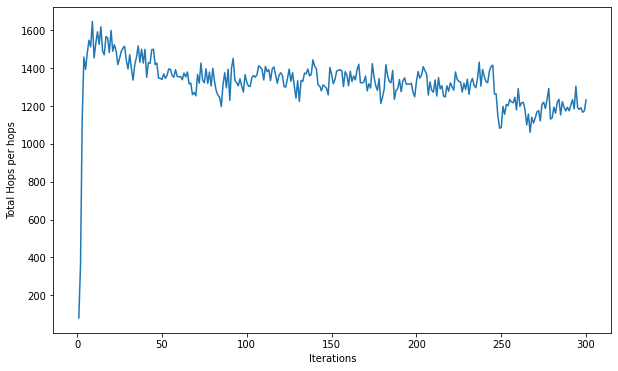

0
{'Uk': 22278, 'Y<': 3373, 'YV': 1086, 'Wr': 23125, 'SR': 21922, 'BO': 22126, 'UV': 21848, 'XA': 21978, 'Vw': 22383, 'oq': 21501, 'dD': 22318, '^n': 21718, 'Wz': 18657, 'Tp': 22052, 'jy': 22356, '>@': 21830, 'ag': 1795, 'xL': 22731, 'mh': 21375, '`t': 17701, '?<': 22622}
No of nodes=  100
Nearest neighbours=  8
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 20


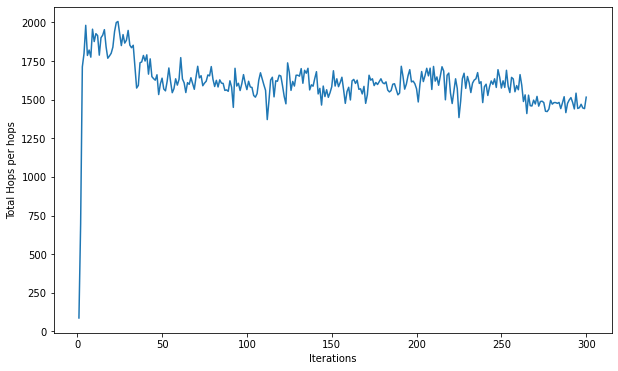

0
{'p^': 29960, 'IO': 30197, '`_': 26079, 'EZ': 29746, 'aa': 29208, 'B@': 30375, 'Cb': 29707, 'ol': 29234, 'W[': 30024, 'o`': 3070, 'lj': 29839, 'N]': 2716, '>>': 28, '<]': 29702, 'q]': 29256, 'pD': 30244, 'gr': 29883, 't`': 4052, 'Io': 29588, '<s': 30119}
No of nodes=  100
Nearest neighbours=  9
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 26


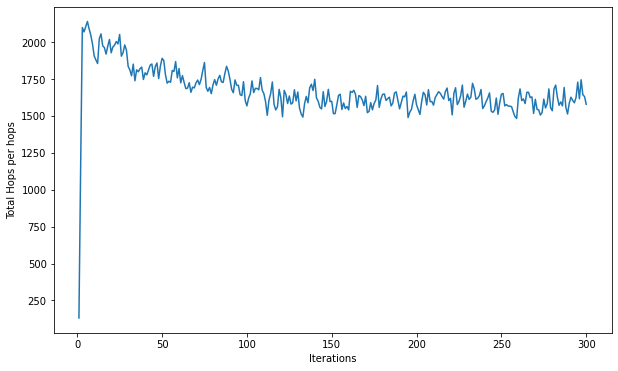

0
{'Pe': 97, 'DG': 10636, 'cP': 30263, 'Gv': 581, '=u': 2284, '<m': 29709, 'X>': 30042, 'in': 29414, '>k': 5907, 'rb': 30286, 'yS': 29859, '[E': 29884, 'mi': 30560, '`D': 36, 'nS': 30310, 'W\\': 29327, 'WV': 71, 'HR': 30203, 'rq': 29601, 'a\\': 30135, 'qz': 9, 'KB': 29989, 'Br': 29655, '_q': 29964, 'vL': 161, 'z>': 2461}
No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 30


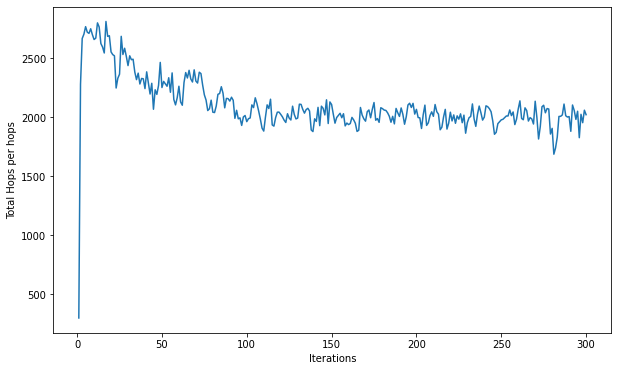

0
{'cB': 1790, 'g?': 38101, 'y=': 2413, 'uR': 37265, 'nD': 873, 'Kf': 26, 'co': 37434, 'jC': 6, 'd\\': 10850, 'gQ': 4017, '>x': 179, 'un': 36700, 'Hp': 37953, 'QQ': 47, 'hk': 37442, 'IS': 35984, '?p': 37211, 'Dl': 20, 'XW': 36329, '\\Y': 37999, 'RB': 11, 'ic': 37101, 'Cy': 37026, 'Dw': 37021, 'nK': 37275, 'lQ': 3392, 'aK': 37487, 'K?': 4894, 'P^': 8237, 'oZ': 37432}
No of nodes=  100
Nearest neighbours=  11
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 26


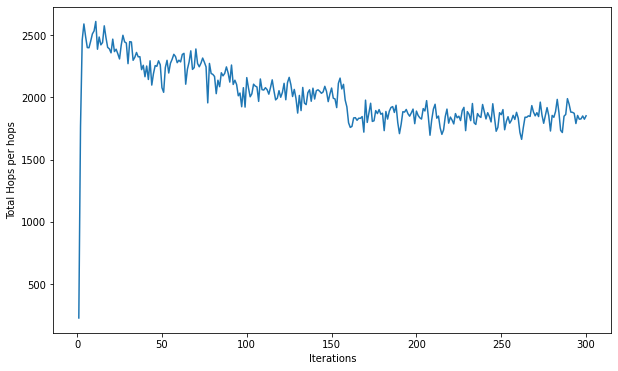

0
{'mW': 36761, 'NN': 4095, 'JR': 515, 'T=': 37581, 'ti': 37657, ']d': 36971, '=q': 9369, 'Rm': 37824, '@K': 37046, 'pj': 135, 'sP': 10465, 'Xm': 36752, 'xu': 2288, 'aH': 20139, 'gi': 2868, 'pP': 37132, 'CR': 37224, 'zT': 37766, 'td': 39, '<>': 355, 'wn': 36576, '`g': 37155, '=i': 37308, 'n`': 35599, 'Mk': 21, 'k@': 36322}
No of nodes=  100
Nearest neighbours=  12
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 21


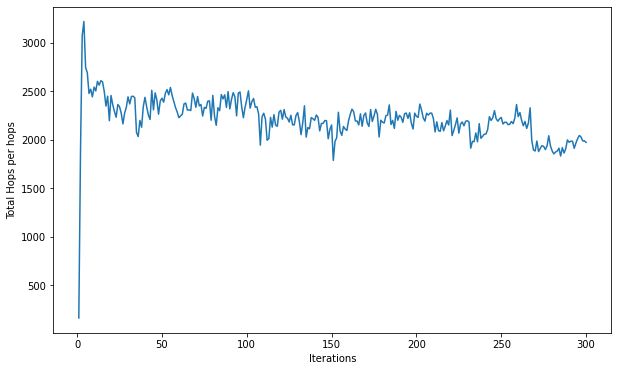

0
{'bd': 340, 'Bi': 15775, 'pq': 43481, 'DE': 2144, 'cR': 42664, 'O<': 38538, 'c=': 43254, 'o=': 43927, 'eE': 42300, 'Rw': 632, 'LM': 43691, 'fx': 43568, 'y>': 44072, 'fi': 43543, 'Xr': 769, 'PJ': 43258, 'tR': 43331, 'jv': 43247, 'CB': 43411, '?K': 107, 'rc': 43504}
No of nodes=  100
Nearest neighbours=  13
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 24


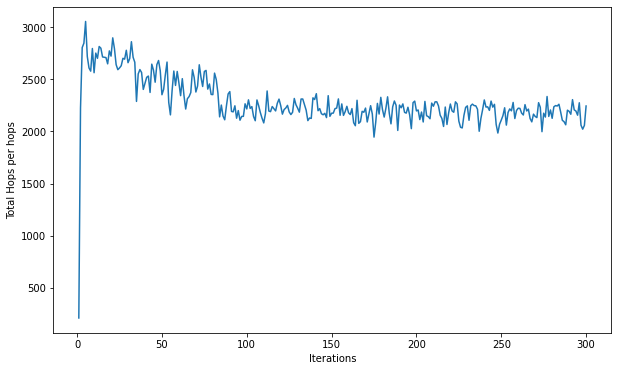

0
{'`J': 43639, 'mA': 11187, 'kd': 43814, 'OZ': 44827, 'AZ': 43345, '<]': 30, 'WV': 42769, 'wO': 13524, 'nv': 432, 'Dm': 43774, '?x': 2460, '?m': 38, 'Ep': 44404, 'ma': 43173, 'qT': 44224, 'mf': 43217, 'A@': 43441, 'LF': 43816, 'Xz': 4848, 'oO': 42461, 'WE': 43237, 'VA': 49, 'a^': 43149, 'Pw': 79}
No of nodes=  100
Nearest neighbours=  14
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 23


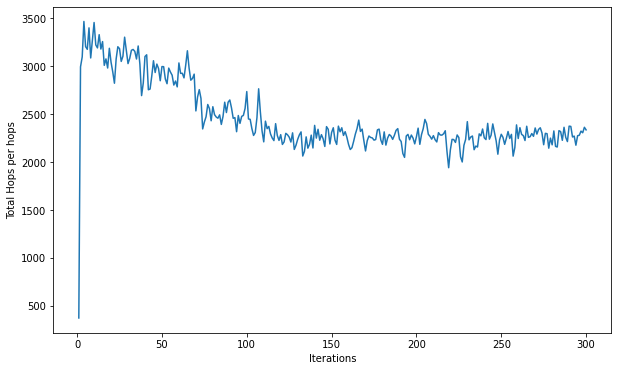

0
{'z@': 49663, 'ev': 48632, '=s': 49344, '\\d': 10841, 'Po': 49176, 'en': 47978, 'Zs': 48882, 'nl': 49798, '_j': 43, 'f<': 49202, 'Cm': 18271, 'GT': 12718, 'xi': 49811, 'Vh': 48538, 'cX': 1902, 'L<': 132, 'S_': 49150, 'L]': 49373, 'yP': 49114, '[Z': 48533, 'ak': 2250, 'pi': 5460, '[i': 68}
No of nodes=  100
Nearest neighbours=  15
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 29


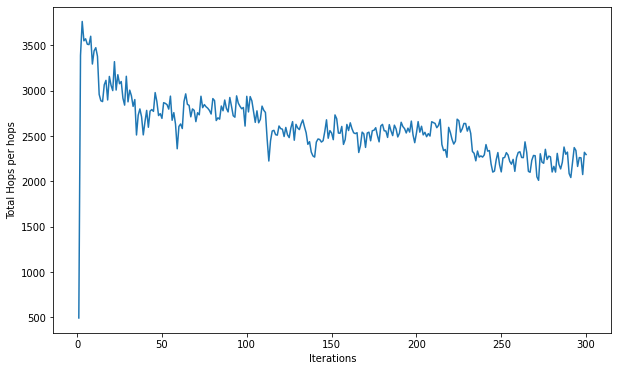

0
{'mf': 39631, 'No': 1930, 'xz': 49744, 'ju': 49396, 'dM': 50552, 'QW': 50839, '\\t': 49297, 'H[': 19311, 'l=': 149, 'nD': 325, 'lw': 49590, 'D>': 69, 'Po': 50792, 'ur': 105, 'qf': 51268, 'tq': 50250, 'SD': 1441, 'Q`': 2189, 'SC': 3319, 'bs': 112, 'zB': 49166, 'L?': 49855, '^u': 50190, 'mm': 38, 'FH': 316, '^I': 3733, 'Px': 6051, '?e': 48734, '=g': 48669}
No of nodes=  100
Nearest neighbours=  16
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 25


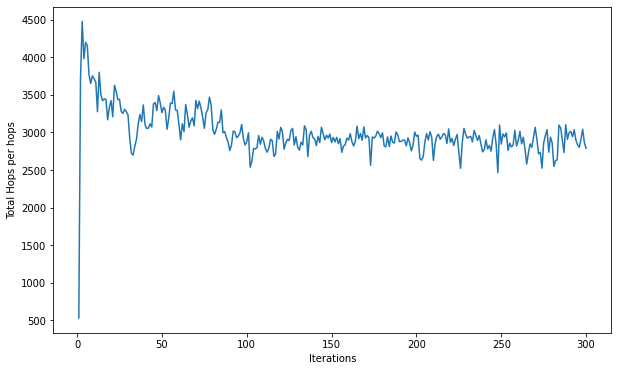

0
{']o': 56644, 'Jk': 58276, 'jG': 1948, 'G^': 3435, '_U': 58444, 'LD': 56962, 'bx': 95, 'V?': 256, 'L=': 54236, 'az': 58262, 'PX': 1445, 'Du': 57628, 'Ak': 1071, '`L': 57669, 'xZ': 55666, 'mV': 57481, 'n^': 254, 'ug': 58394, 'oy': 2597, 'Q=': 14774, 'Ee': 57940, 'zf': 16208, '^K': 55572, '^p': 57462, 'Bc': 57370}
No of nodes=  100
Nearest neighbours=  17
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 26


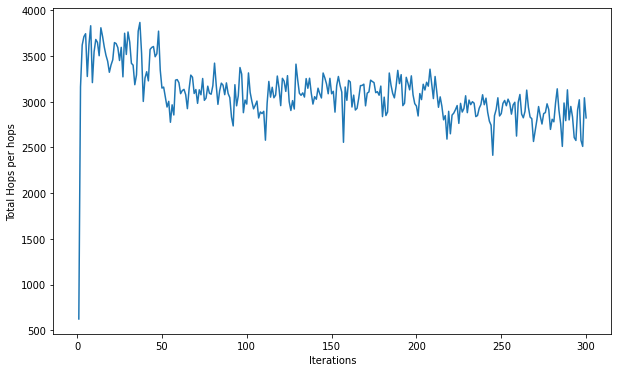

0
{'>X': 8910, 'Io': 57071, 'Ak': 56024, '[c': 57507, 'oQ': 8711, '_g': 57360, 'Cf': 58500, 'Qs': 55428, 'mx': 19, 'sY': 57022, 'TU': 58031, 'Sm': 56489, 'yQ': 57382, ']T': 58436, 'Ib': 209, 'r>': 3564, 'f]': 54119, 'Se': 56428, 'PI': 42209, 'qy': 57063, 'jp': 18, 'NA': 241, 'bh': 19, 'el': 192, '?X': 56134, 'US': 9667}
No of nodes=  100
Nearest neighbours=  18
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 21


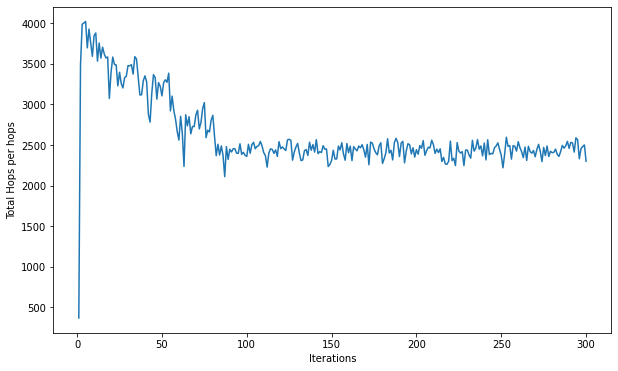

0
{'TA': 10618, 'aq': 7075, 'Ce': 1122, 'cq': 57906, 'VI': 57808, 'HP': 56758, 'IX': 57118, 'nE': 2908, 'g^': 56409, 'py': 4861, 'ay': 57400, 'aA': 57747, 'hj': 16497, 'lF': 55911, 'Bi': 449, 'Uw': 56822, 'gG': 1760, 'A\\': 58017, 'wc': 58082, 'xd': 57454, 'DC': 56896}
No of nodes=  100
Nearest neighbours=  19
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 19


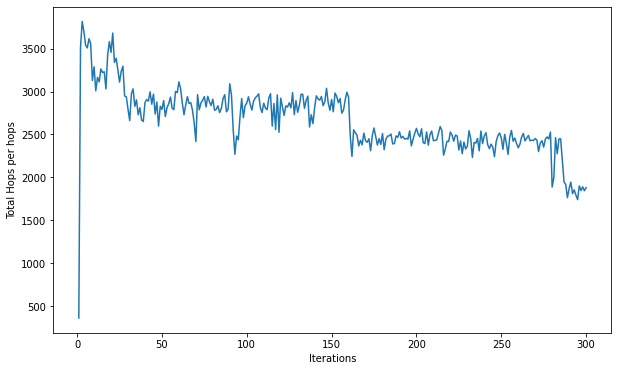

0
{'mj': 59097, '_t': 617, 'Af': 58365, 'fT': 57988, 'vG': 55342, 'uU': 57299, 'sG': 58378, 'OP': 57890, 'pl': 32435, 'gF': 334, 'ks': 309, 'br': 57975, 'px': 57639, 'KW': 58380, 'gs': 58428, 'NG': 58527, 'VK': 58350, 'DX': 5066, '`<': 4296}


In [ ]:
for nearest_neighbour in range(2,20):
  Simulation_totalHops_Per_Iteration(100,nearest_neighbour,0.5,3,300,10,2)

#Per message Total Hops

In [ ]:
def per_Msg_total_hops_Calc(population,k,dict,iter,sharability):
  g=0
  x=[]
  y=[]
  next=[]
  cur=[]
  total=0
  for node in population:
    #print("here")
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
      next.append(node['index'])
  iteration=1
  while(iteration<=iter):
    cur=next
    next=[]
    if(len(cur)==0):
      print(iteration)
      break
    for el in cur:
      for msg in population[el]['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,el,next,sharability) 
        #print(total)
    
    x.append(iteration)
    y.append(total) 
    total=0
    iteration+=1
  return (total) 

def Simulation_per_Msg_total_hops_Calc(no_nodes,no_of_connected_components,p,percent,iter,mem,sharability):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  print("Size of memory= ",mem)
  print("Total iterations= ",iter)
  print("Sharability is =",(100/sharability),"%")
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("no of msgs",g)
  per_Msg_total_hops_Calc(population,mem,dict,iter,sharability)
  for msg in dict:
    x.append(msg)
    y.append(dict[msg])
  fig = plt.figure(figsize = (10, 5))
  plt.bar(x, y, color ='maroon',width = 0.4)
  plt.xlabel("msgs")
  plt.ylabel("Total hops")
  plt.title("Total Hops per Message")
  plt.show()
  #return population



```
`# This is formatted as code`
```

##OBSERVATIONS(per message total hops)

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 1
no of msgs 23


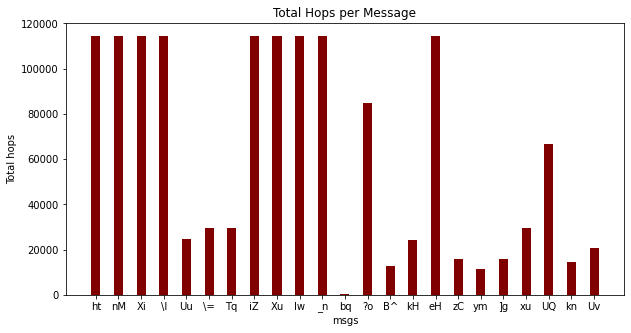

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 22


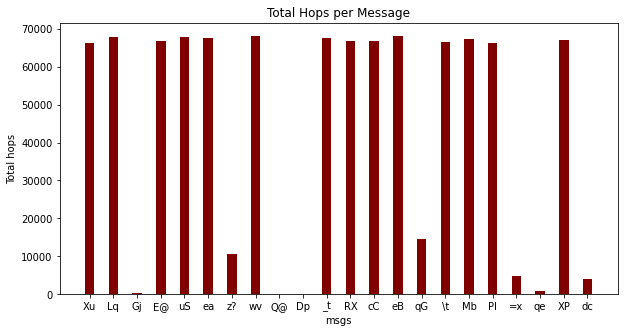

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 3
no of msgs 27


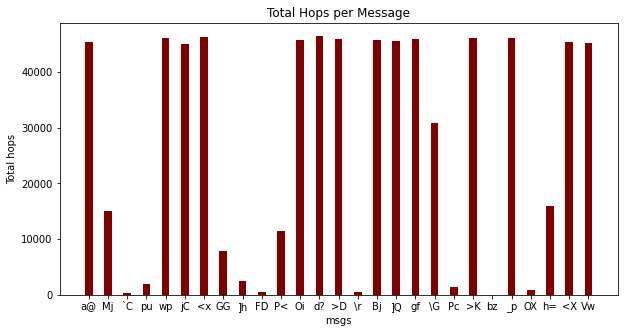

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 4
no of msgs 24


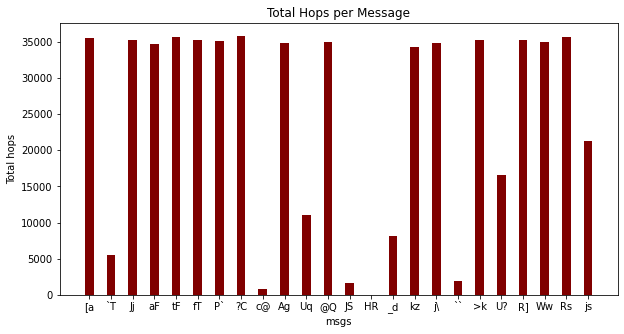

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 5
no of msgs 31


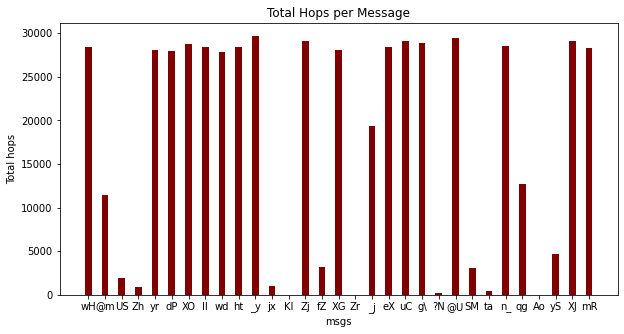

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 6
no of msgs 31


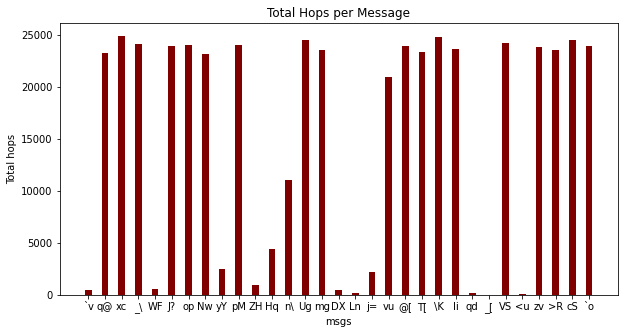

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 7
no of msgs 25


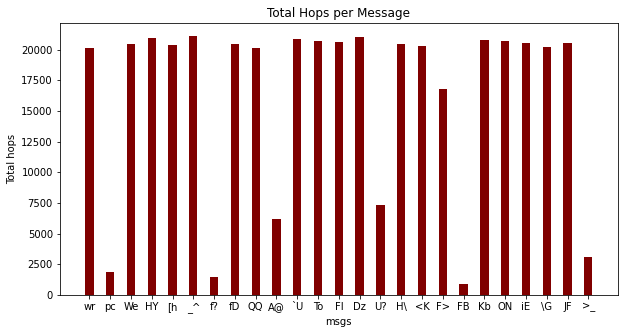

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 8
no of msgs 21


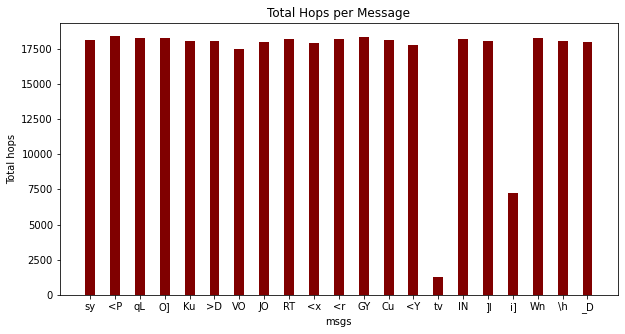

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 9
no of msgs 32


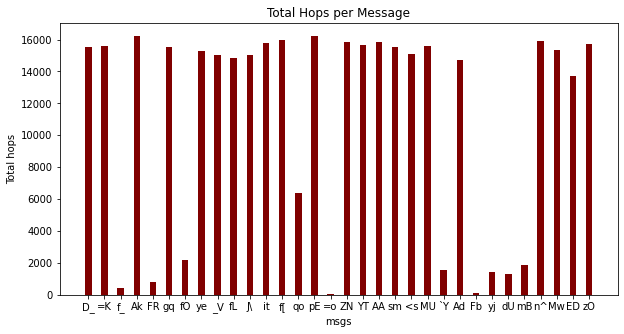

In [ ]:
for sharability in range(1,10):
  Simulation_per_Msg_total_hops_Calc(100,20,0.5,3,300,10,sharability)

No of nodes=  100
Nearest neighbours=  5
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 26


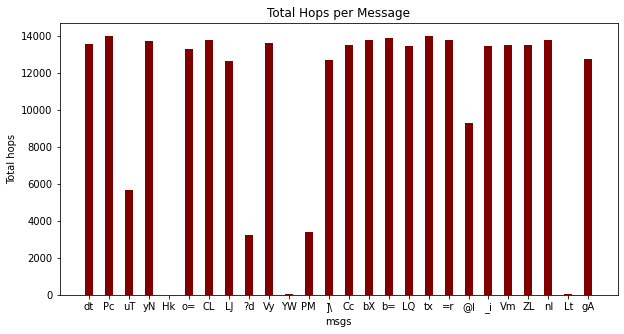

No of nodes=  100
Nearest neighbours=  6
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 20


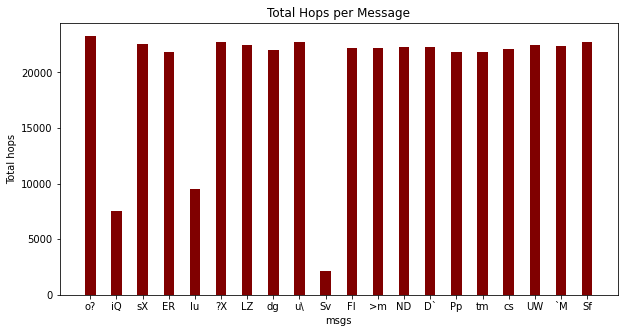

No of nodes=  100
Nearest neighbours=  7
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 27


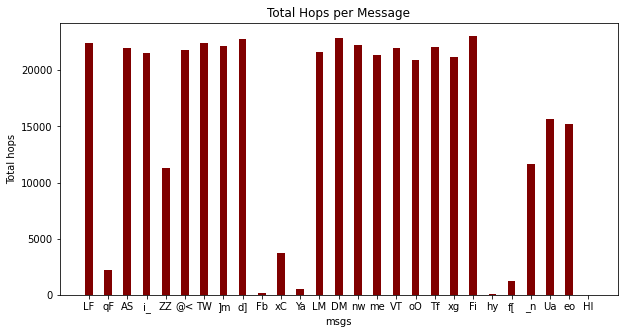

No of nodes=  100
Nearest neighbours=  8
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 16


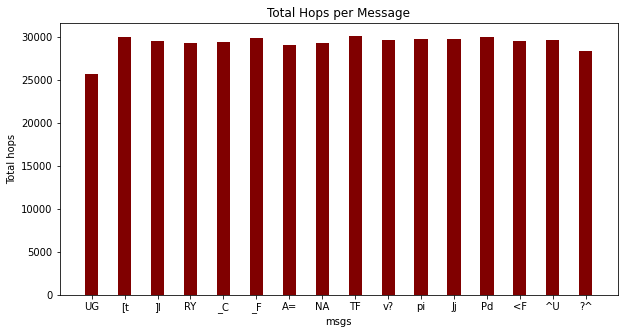

No of nodes=  100
Nearest neighbours=  9
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 36


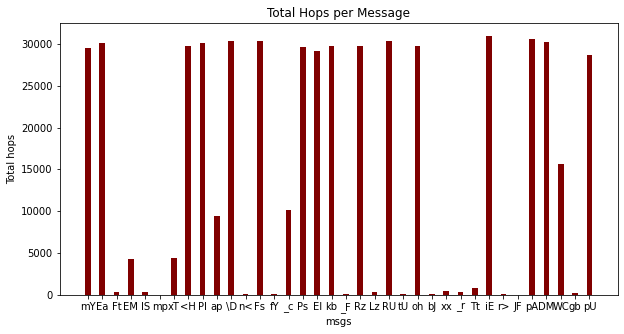

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 27


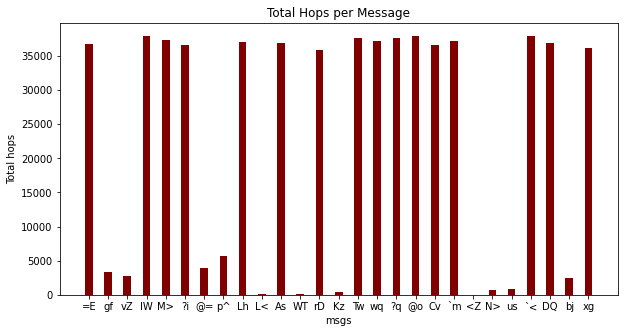

No of nodes=  100
Nearest neighbours=  11
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 18


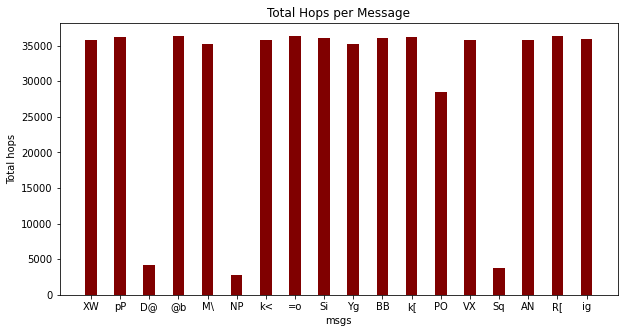

No of nodes=  100
Nearest neighbours=  12
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 24


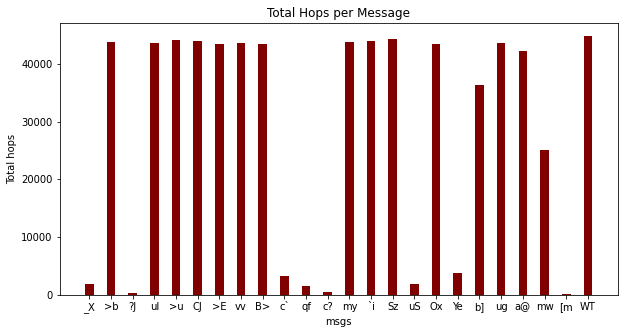

No of nodes=  100
Nearest neighbours=  13
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 22


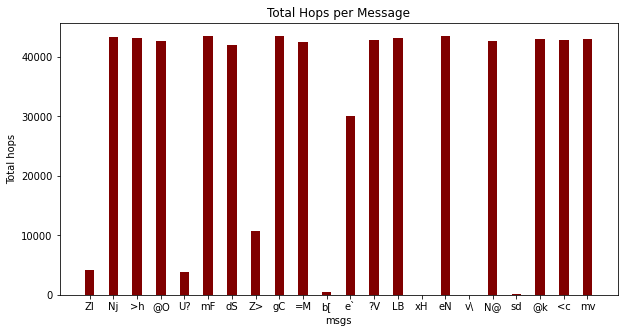

No of nodes=  100
Nearest neighbours=  14
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 23


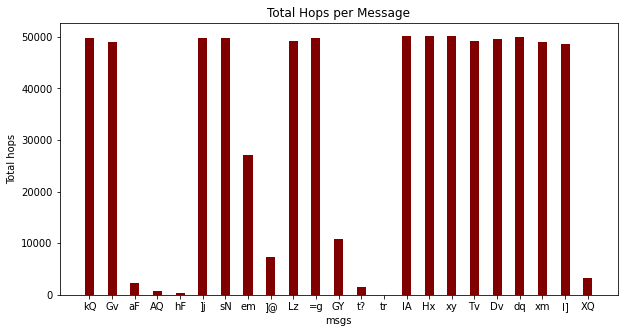

No of nodes=  100
Nearest neighbours=  15
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 25


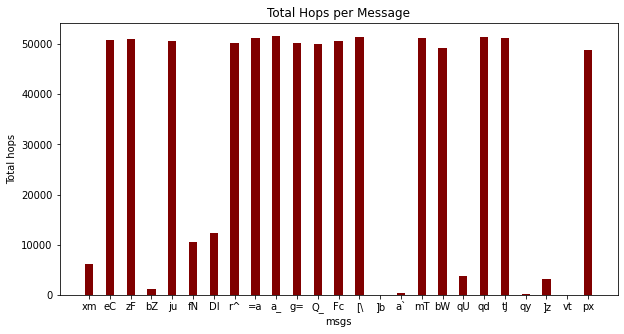

No of nodes=  100
Nearest neighbours=  16
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 27


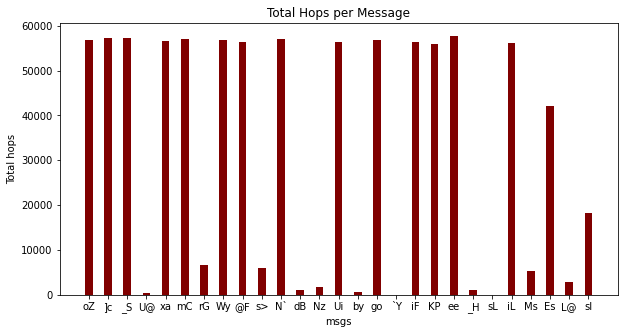

No of nodes=  100
Nearest neighbours=  17
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 25


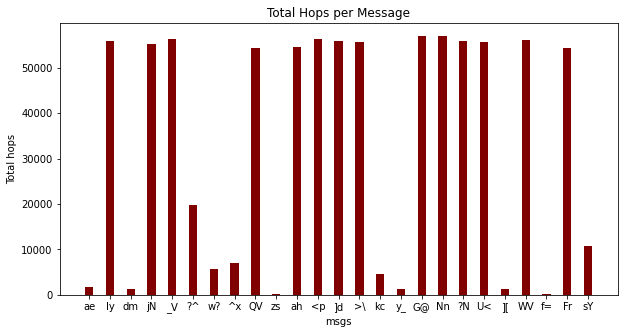

No of nodes=  100
Nearest neighbours=  18
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 28


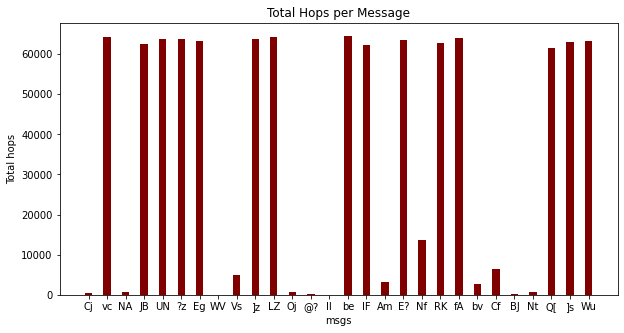

No of nodes=  100
Nearest neighbours=  19
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 35


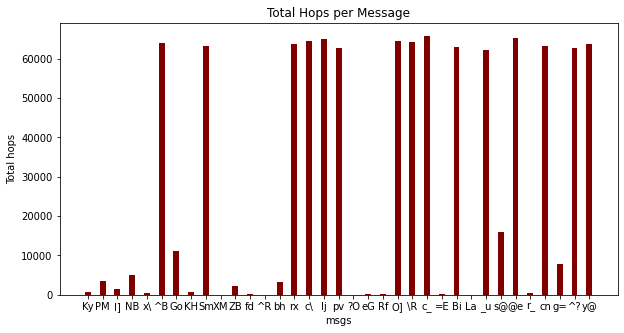

In [ ]:
for nearest_neighbours in range(5,20):
  Simulation_per_Msg_total_hops_Calc(100,nearest_neighbours,0.5,3,300,10,2)

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  5
Total iterations=  300
Sharability is = 2
no of msgs 30


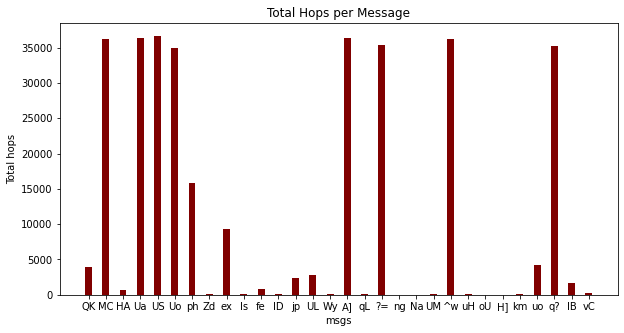

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  6
Total iterations=  300
Sharability is = 2
no of msgs 24


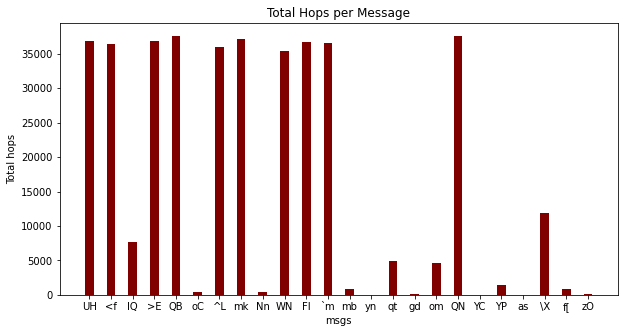

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  7
Total iterations=  300
Sharability is = 2
no of msgs 15


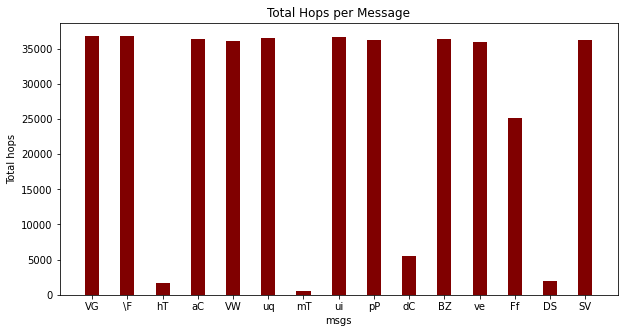

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  8
Total iterations=  300
Sharability is = 2
no of msgs 19


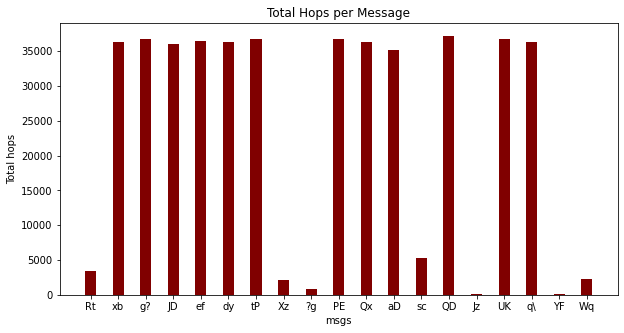

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  9
Total iterations=  300
Sharability is = 2
no of msgs 18


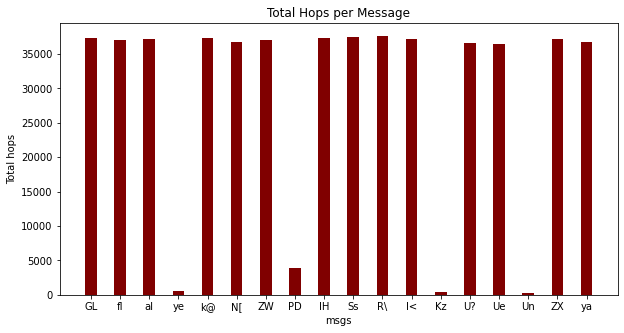

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 2
no of msgs 23


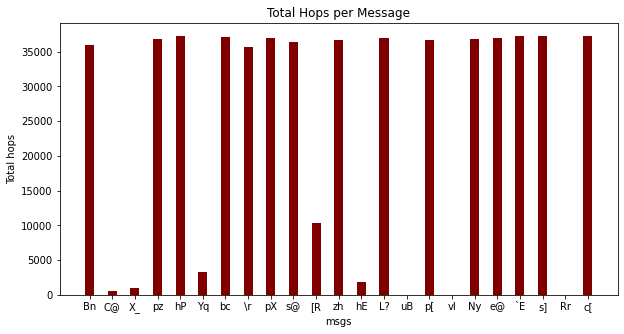

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  11
Total iterations=  300
Sharability is = 2
no of msgs 12


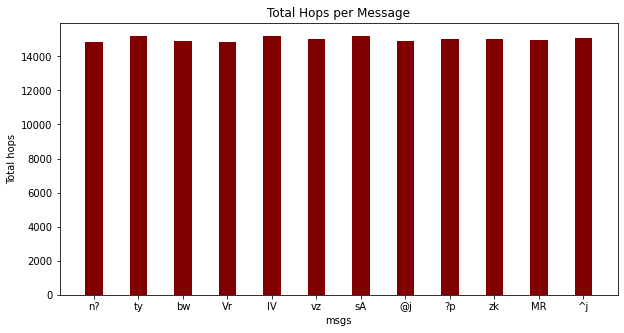

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  12
Total iterations=  300
Sharability is = 2
no of msgs 21


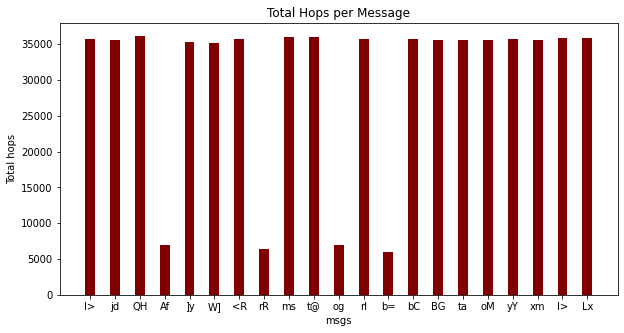

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  13
Total iterations=  300
Sharability is = 2
no of msgs 19


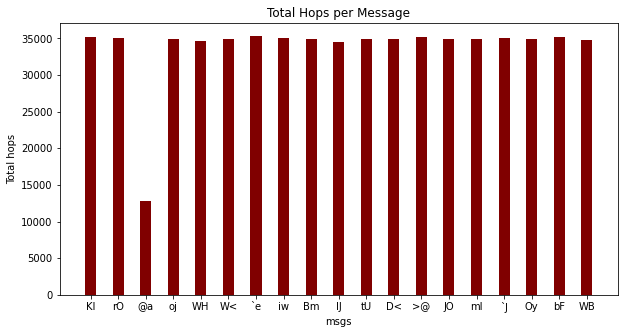

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  14
Total iterations=  300
Sharability is = 2
no of msgs 20


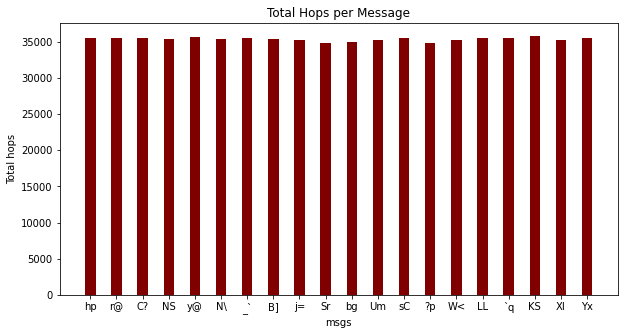

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  15
Total iterations=  300
Sharability is = 2
no of msgs 24


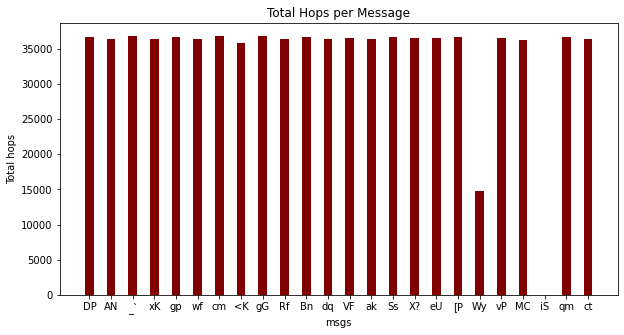

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  16
Total iterations=  300
Sharability is = 2
no of msgs 17


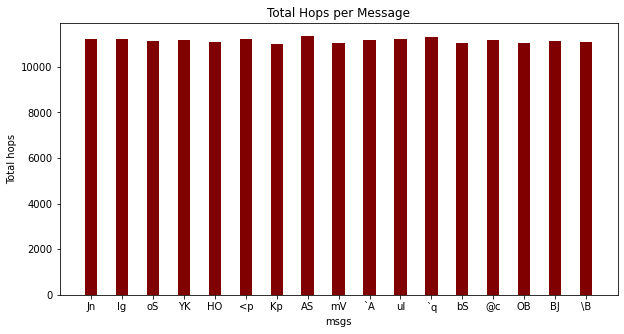

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  17
Total iterations=  300
Sharability is = 2
no of msgs 21


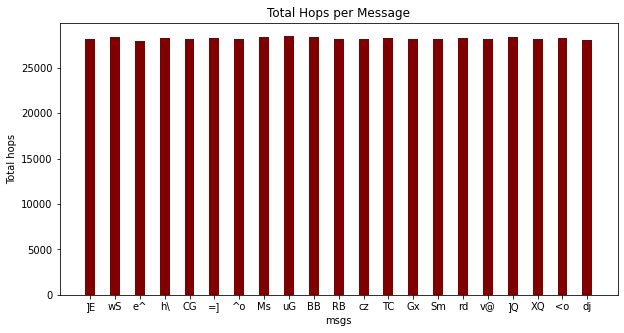

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  18
Total iterations=  300
Sharability is = 2
no of msgs 23


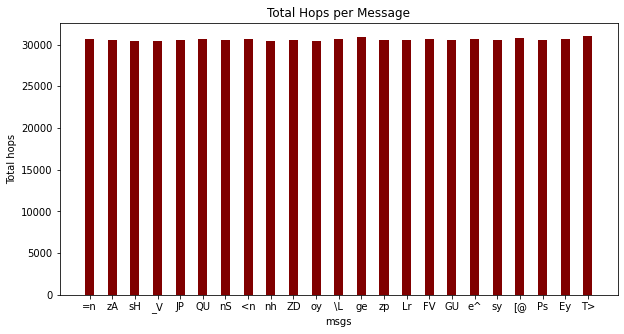

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  19
Total iterations=  300
Sharability is = 2
no of msgs 24


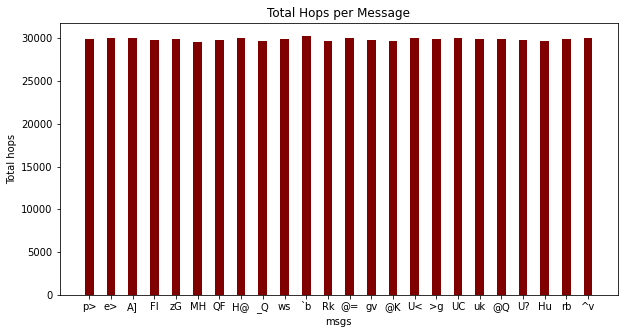

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  20
Total iterations=  300
Sharability is = 2
no of msgs 13
6


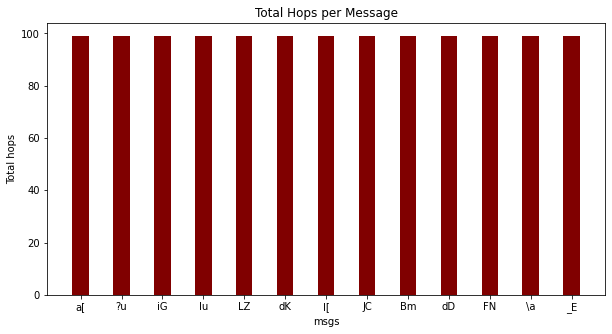

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  21
Total iterations=  300
Sharability is = 2
no of msgs 18
6


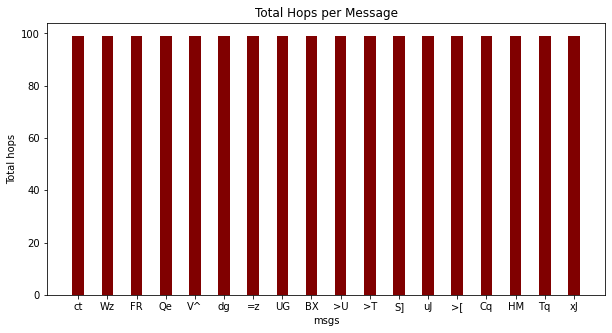

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  22
Total iterations=  300
Sharability is = 2
no of msgs 20
7


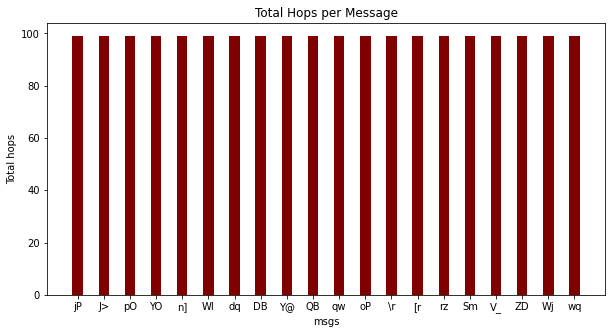

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  23
Total iterations=  300
Sharability is = 2
no of msgs 20
6


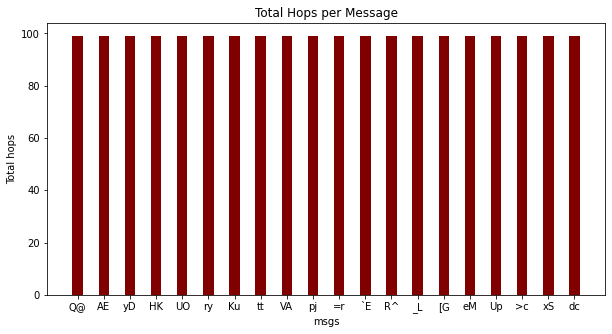

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  24
Total iterations=  300
Sharability is = 2
no of msgs 19
6


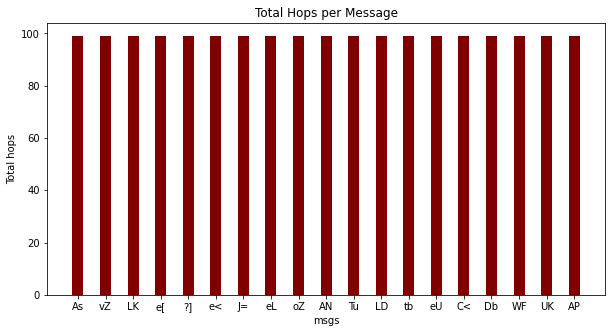

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  25
Total iterations=  300
Sharability is = 2
no of msgs 23
8


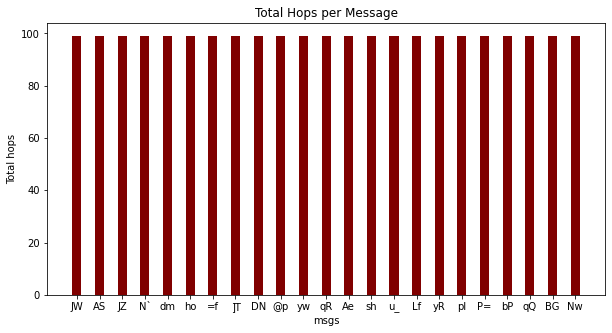

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  26
Total iterations=  300
Sharability is = 2
no of msgs 23
6


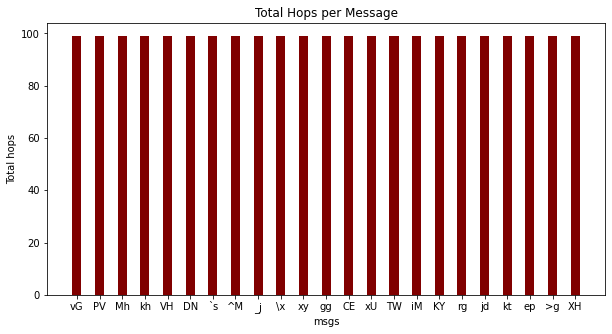

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  27
Total iterations=  300
Sharability is = 2
no of msgs 15
6


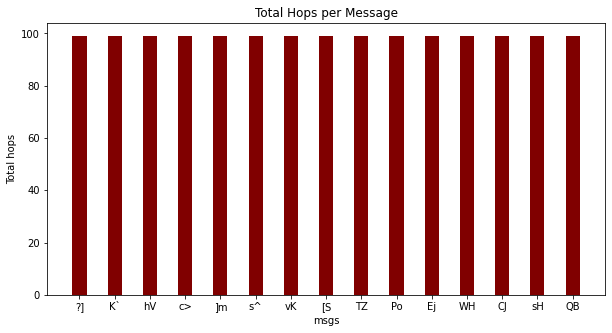

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  28
Total iterations=  300
Sharability is = 2
no of msgs 21
6


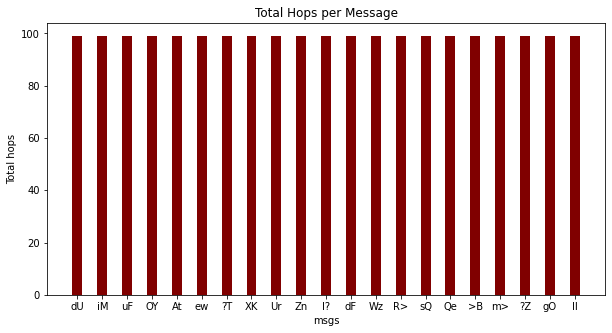

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Size of memory=  29
Total iterations=  300
Sharability is = 2
no of msgs 21
6


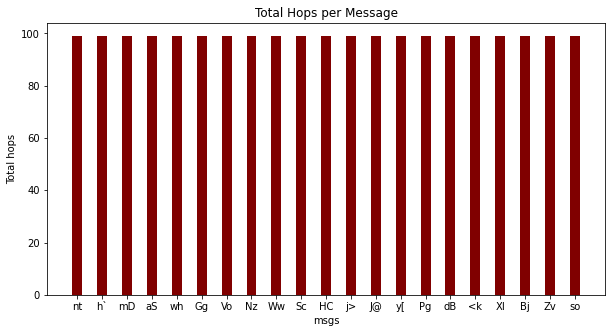

In [ ]:
for memory in range(5,30):
  Simulation_per_Msg_total_hops_Calc(100,10,0.5,4,300,memory,2)

#Average hops per iteration vs iteration
Average Hops per iteration=((Total Hops in that iteration)/(number of nodes distributing message in this round)).

In [ ]:
def Avg_hops_per_Iteration_Calc(population,k,dict,iter,sharability):
  g=0
  x=[]
  y=[]
  next=[]
  cur=[]
  total=0
  for node in population:
    #print("here")
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
      next.append(node['index'])
  iteration=1
  while(iteration<=iter):
    #if(iteration%2==0):
     # print(iteration)
    cur=next
    next=[]
    if(len(cur)==0):
      print(iteration)
      break
    for el in cur:
      for msg in population[el]['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,el,next,sharability) 
        #print(total)
    
    x.append(iteration)
    y.append(total/len(cur)) 
    total=0
    #print(total)          
    #print(iteration)
    iteration+=1
  plotXY(x,y,"Iterations","Average Hops per iteration") 
  print(total)
  return (total) 

def Simulation_Avg_hops_per_Iteration(no_nodes,no_of_connected_components,p,percent,iter,mem,sharability):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  print("Size of memory= ",mem)
  print("Total iterations= ",iter)
  print("Sharability is =",(100/sharability),"%")
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("no of msgs",g)
  Avg_hops_per_Iteration_Calc(population,mem,dict,iter,sharability)
  #print(dict)
  #return population

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 27


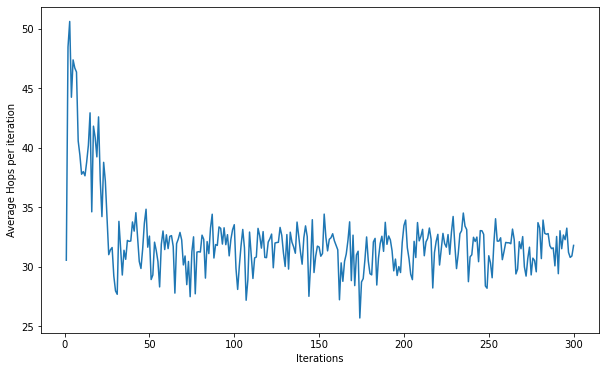

0


In [ ]:
Simulation_Avg_hops_per_Iteration(100,20,0.5,3,300,10,2)
  

#OBSERVATIONS(Average hops per iteration vs iterations)

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 50.0 %
no of msgs 21


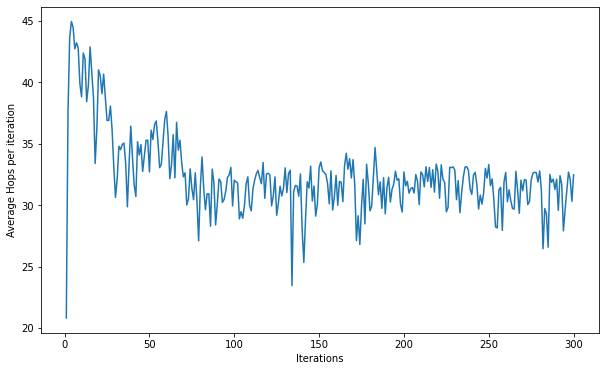

0
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 25.0 %
no of msgs 30


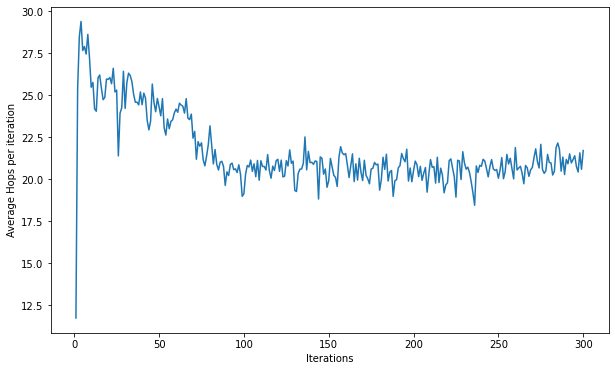

0
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 16.666666666666668 %
no of msgs 27


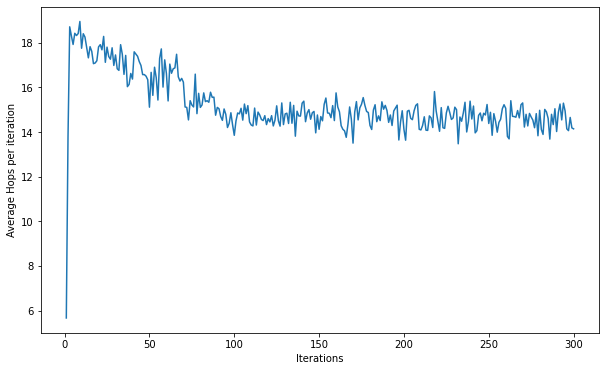

0
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 12.5 %
no of msgs 27


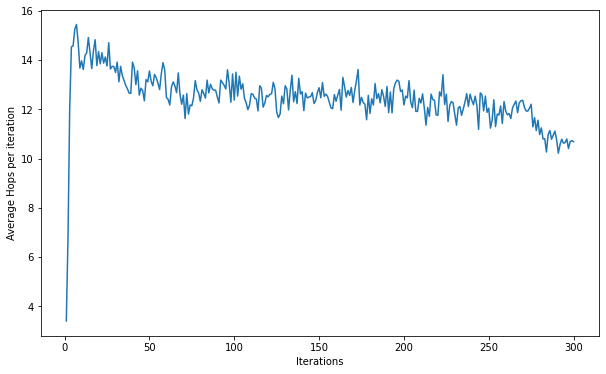

0
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 10.0 %
no of msgs 28


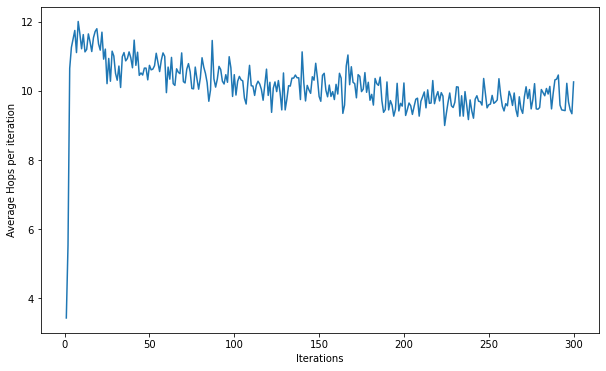

0
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  10
Total iterations=  300
Sharability is = 8.333333333333334 %
no of msgs 25


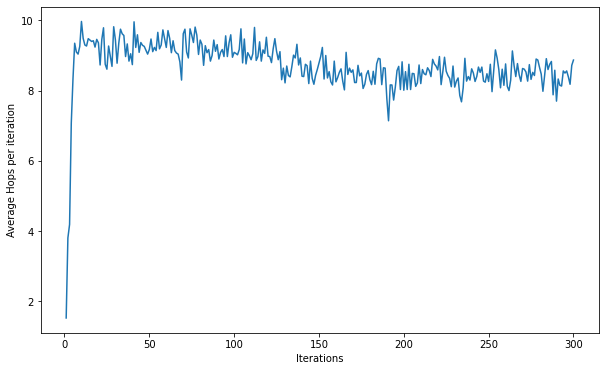

0


In [ ]:
sharability=2
while(sharability<=12):## variation of average hops with sharability
  Simulation_Avg_hops_per_Iteration(100,20,0.5,3,300,10,sharability)
  sharability+=2

No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  2
Total iterations=  300
Sharability is = 50.0 %
no of msgs 30


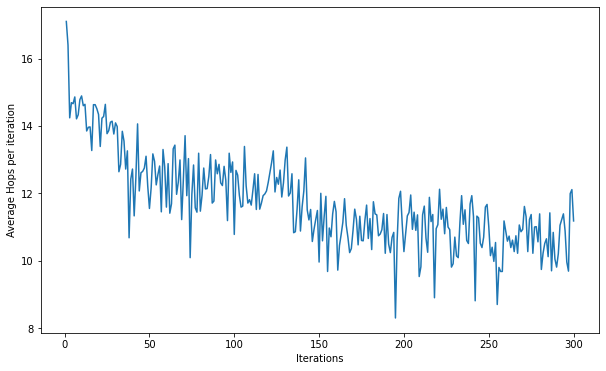

0
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  7
Total iterations=  300
Sharability is = 50.0 %
no of msgs 29


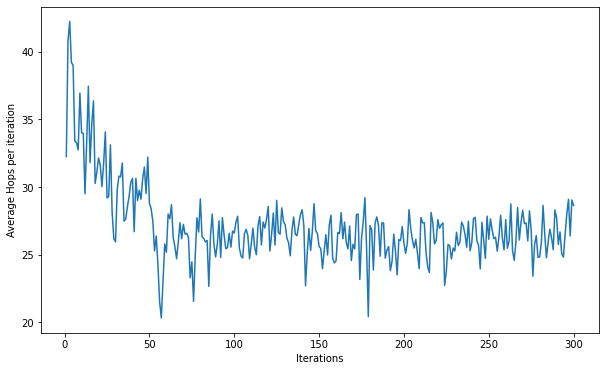

0
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  12
Total iterations=  300
Sharability is = 50.0 %
no of msgs 23


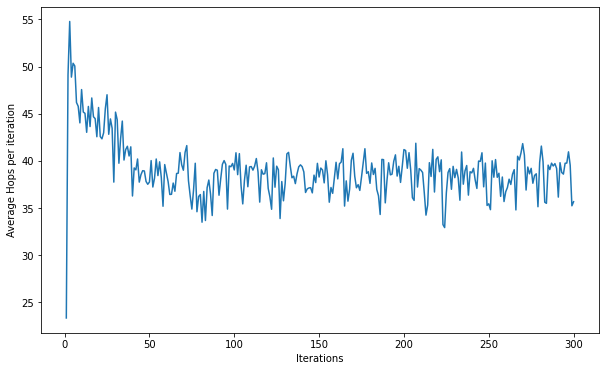

0
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  17
Total iterations=  300
Sharability is = 50.0 %
no of msgs 31


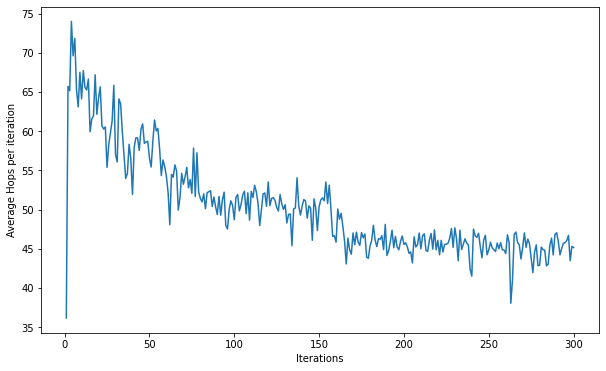

0
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  22
Total iterations=  300
Sharability is = 50.0 %
no of msgs 23


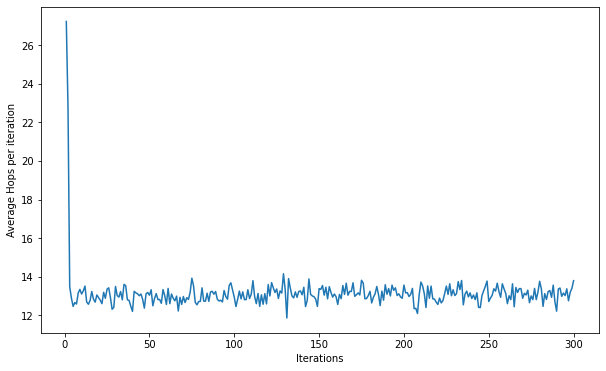

0
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  27
Total iterations=  300
Sharability is = 50.0 %
no of msgs 23
5


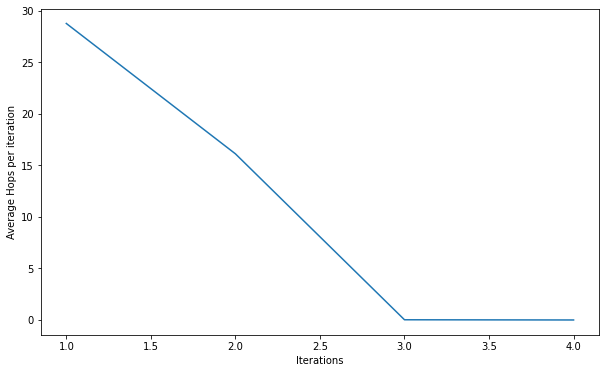

0
No of nodes=  100
Nearest neighbours=  20
Probability  0.5
Size of memory=  32
Total iterations=  300
Sharability is = 50.0 %
no of msgs 28
5


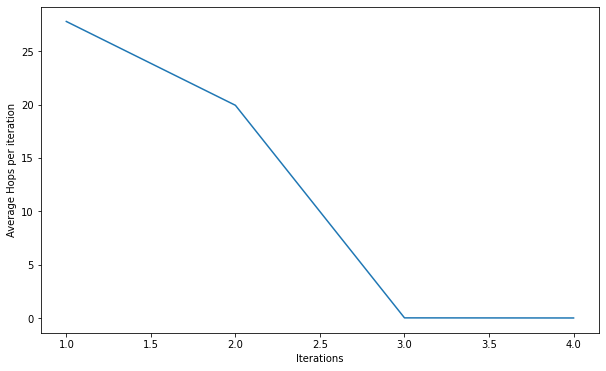

0


In [ ]:
memory=2
while(memory<=35):## variation of average hops with sharability
  Simulation_Avg_hops_per_Iteration(100,20,0.5,3,300,memory,2)
  memory+=5

No of nodes=  100
Nearest neighbours=  4
Probability  0.5
Size of memory=  15
Total iterations=  300
Sharability is = 50.0 %
no of msgs 22


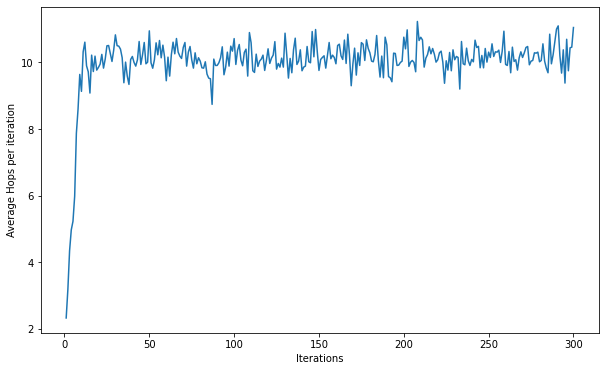

0
No of nodes=  100
Nearest neighbours=  9
Probability  0.5
Size of memory=  15
Total iterations=  300
Sharability is = 50.0 %
no of msgs 31


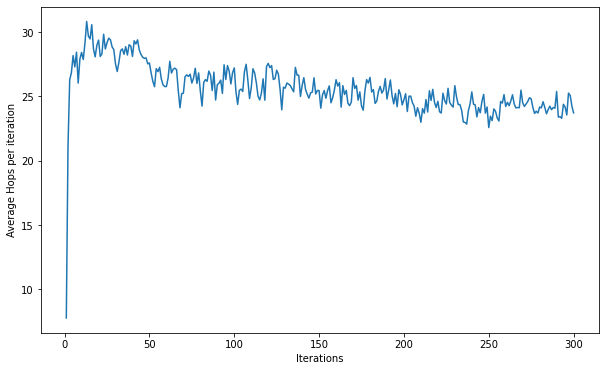

0
No of nodes=  100
Nearest neighbours=  14
Probability  0.5
Size of memory=  15
Total iterations=  300
Sharability is = 50.0 %
no of msgs 28


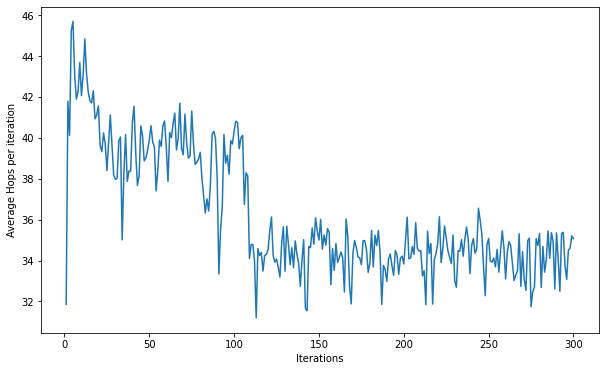

0
No of nodes=  100
Nearest neighbours=  19
Probability  0.5
Size of memory=  15
Total iterations=  300
Sharability is = 50.0 %
no of msgs 26


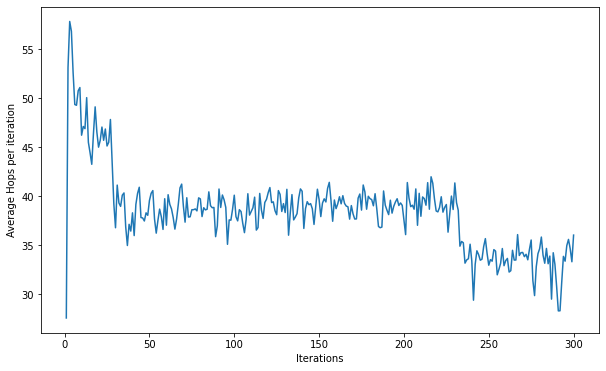

0
No of nodes=  100
Nearest neighbours=  24
Probability  0.5
Size of memory=  15
Total iterations=  300
Sharability is = 50.0 %
no of msgs 25


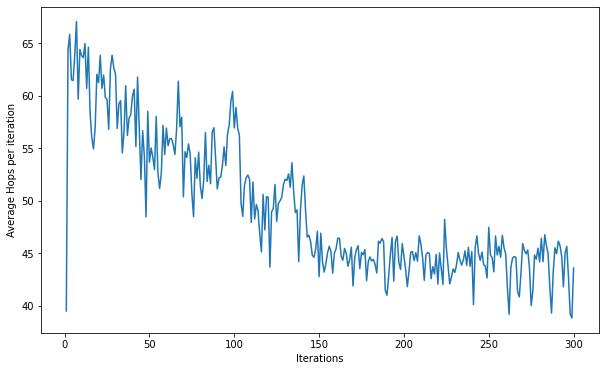

0
No of nodes=  100
Nearest neighbours=  29
Probability  0.5
Size of memory=  15
Total iterations=  300
Sharability is = 50.0 %
no of msgs 27


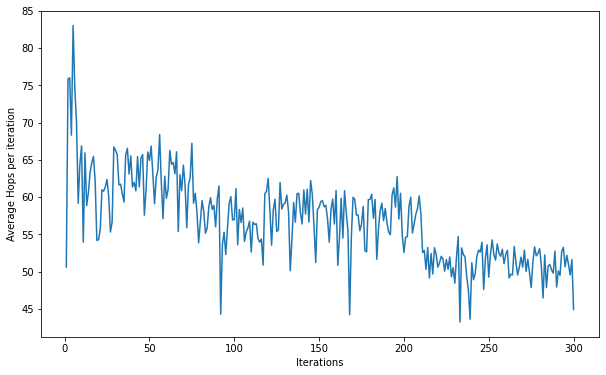

0
No of nodes=  100
Nearest neighbours=  34
Probability  0.5
Size of memory=  15
Total iterations=  300
Sharability is = 50.0 %
no of msgs 22


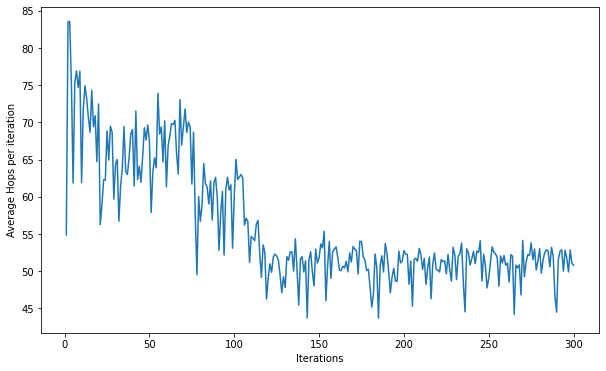

0


In [ ]:
nearest_neighbour=4
while(nearest_neighbour<=35):## variation of average hops with sharability
  Simulation_Avg_hops_per_Iteration(100,nearest_neighbour,0.5,3,300,15,2)
  nearest_neighbour+=5

#Total Hops vs sharability

In [ ]:
def sharability_Vs_Total_Hops_Calc(population,k,dict,iter,sharability):
  g=0
  x=[]
  y=[]
  next=[]
  cur=[]
  total=0
  for node in population:
    #print("here")
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
      next.append(node['index'])
  iteration=1
  while(iteration<=iter):
    #if(iteration%2==0):
     # print(iteration)
    cur=next
    next=[]
    if(len(cur)==0):
      print(iteration)
      break
    for el in cur:
      for msg in population[el]['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,el,next,sharability) 
        #print(total)
    
    
    #print(total)          
    #print(iteration)
    iteration+=1
  return (total) 

def Simulation_sharability_Vs_Total_Hops(no_nodes,no_of_connected_components,p,percent,iter,mem):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  #print("Size of memory= ",mem)
  print("Total iterations= ",iter)
  print("size of memory = ",mem)
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("no of msgs",g)
  for sharability in range(1,30):
    for node in population:
      node['memory']=[]
   # if(j==4 or j==g//2 or j==g ):
     # print(j)
    x.append(100/sharability)
    total=sharability_Vs_Total_Hops_Calc(population,mem,dict,iter,sharability)
    
    y.append(total)
  plotXY(x,y,"sharability in %","Total Hops")
#population

#observations

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  20
size of memory =  10
no of msgs 44
8
4
10
4
6
8
7
4


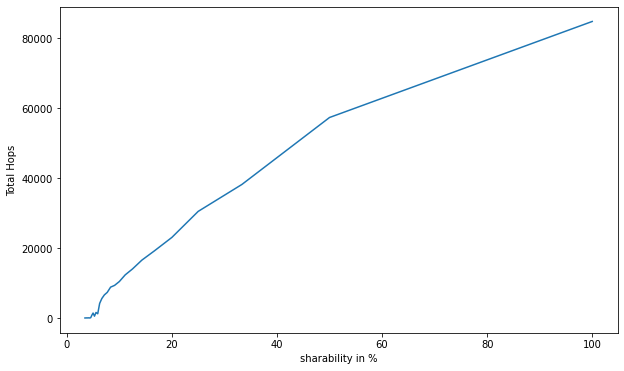

In [ ]:

Simulation_sharability_Vs_Total_Hops(100,10,0.5,2,20,10) #msgs=48 p-length=0.5

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  20
size of memory =  5
no of msgs 37
12
12
7
14
10
11
5
14
6


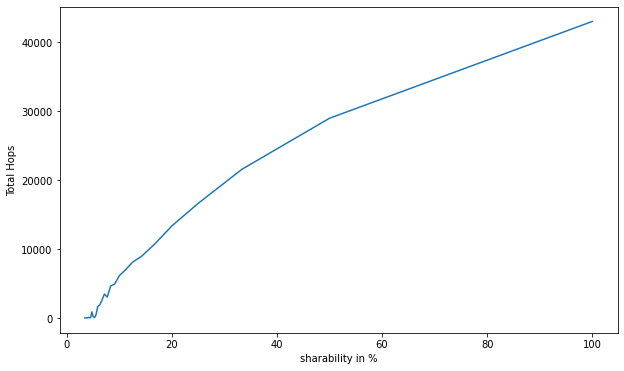

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  20
size of memory =  10
no of msgs 37
7
9
6
6
11
10
7
3
7
5
7
8


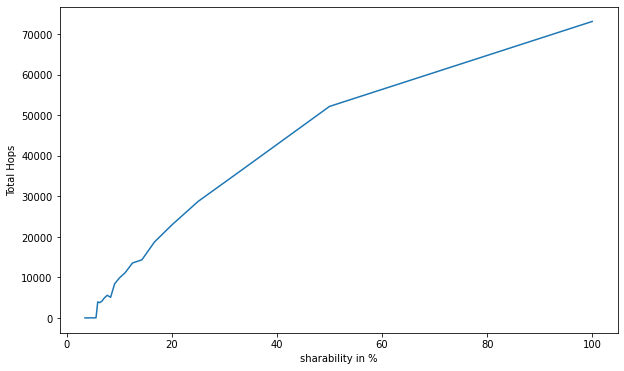

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  20
size of memory =  15
no of msgs 35
13
10
10
6
13
8
9
10
6
5
7
5


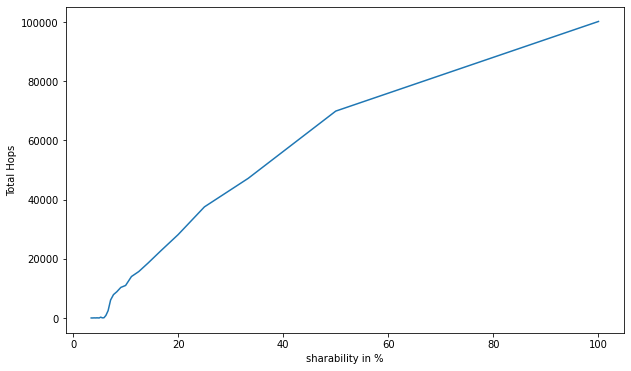

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  20
size of memory =  20
no of msgs 33
10
7
10
5
8
7
8
6
6
5
5
5


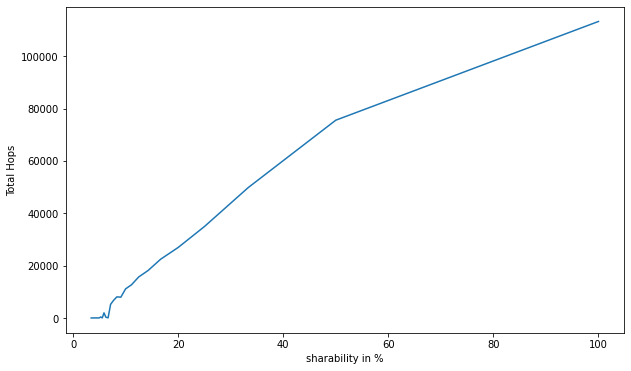

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  20
size of memory =  25
no of msgs 34
9
5
7
7
10
7
7
6
7
7
10


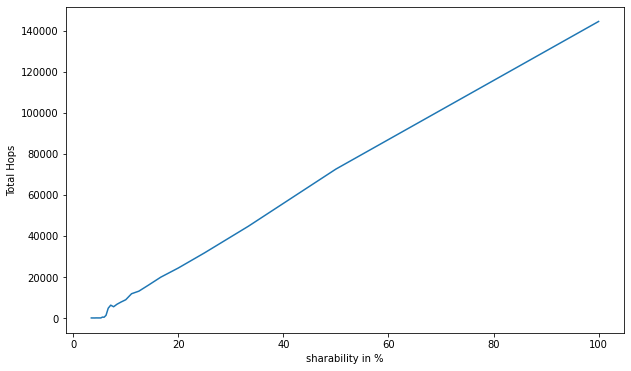

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  20
size of memory =  30
no of msgs 35
17
7
12
7
10
5
11
9
6
6
5


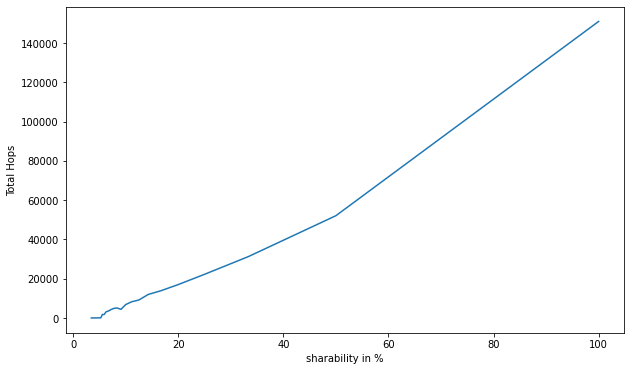

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  20
size of memory =  35
no of msgs 32
5
6
7
8
9
13
13
15
16
8
11
6
19
4
5
8
9
5
5


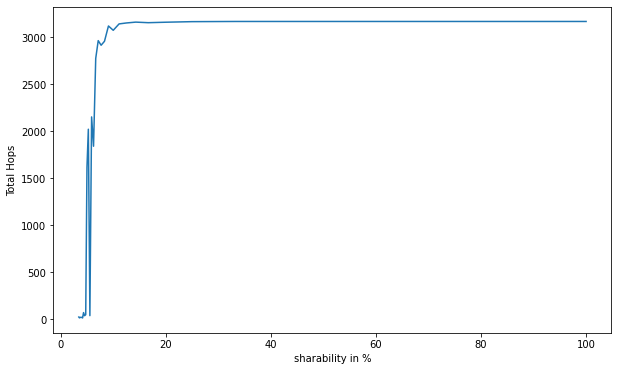

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  20
size of memory =  40
no of msgs 24
5
6
7
16
10
12
12
16
17
9
10
9
7
14
9
8
12
4
5
4
10
5
5
5


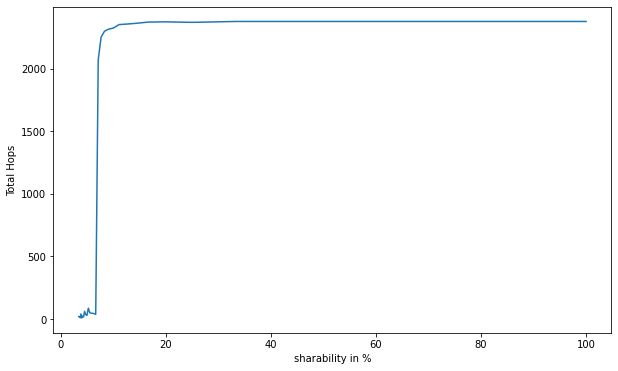

In [ ]:
memory=5
while(memory<=40): ##variation when different memory is given
  Simulation_sharability_Vs_Total_Hops(100,10,0.5,2,20,memory) 
  memory+=5


No of nodes=  100
Nearest neighbours=  4
Probability  0.5
Total iterations=  20
size of memory =  15
no of msgs 28
6
7
8
10
4
8
4
4
4
5
4
3
4
3
4
4
4
4
5
3
4
6
3


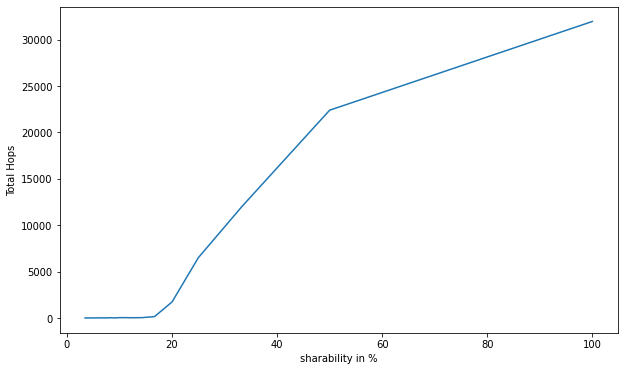

No of nodes=  100
Nearest neighbours=  9
Probability  0.5
Total iterations=  20
size of memory =  15
no of msgs 37
10
6
8
7
5
6
8
7
7
5
4
7
7
8


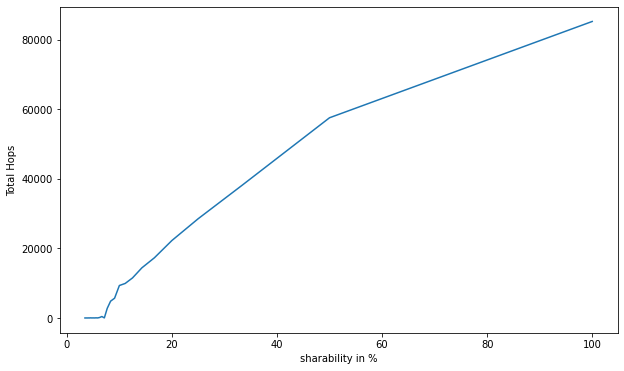

No of nodes=  100
Nearest neighbours=  14
Probability  0.5
Total iterations=  20
size of memory =  15
no of msgs 40
16
9
14


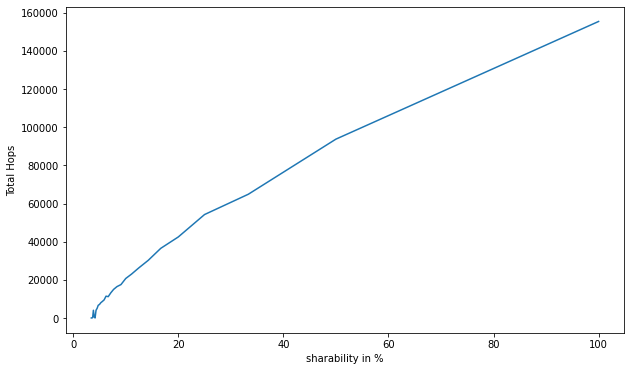

No of nodes=  100
Nearest neighbours=  19
Probability  0.5
Total iterations=  20
size of memory =  15
no of msgs 34


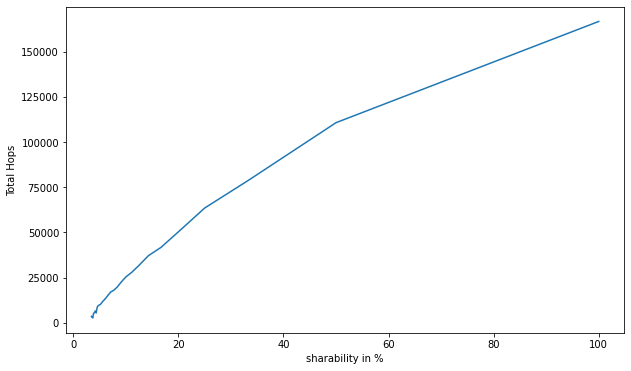

No of nodes=  100
Nearest neighbours=  24
Probability  0.5
Total iterations=  20
size of memory =  15
no of msgs 36


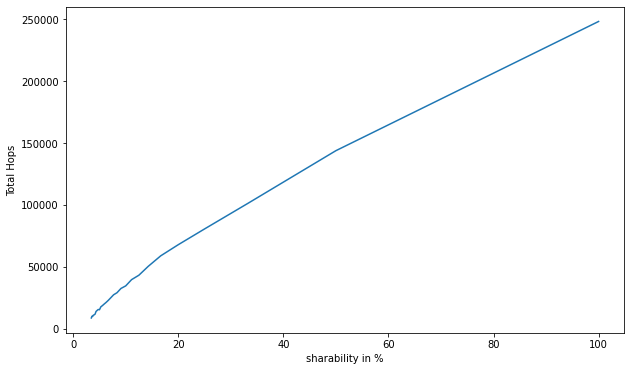

No of nodes=  100
Nearest neighbours=  29
Probability  0.5
Total iterations=  20
size of memory =  15
no of msgs 37


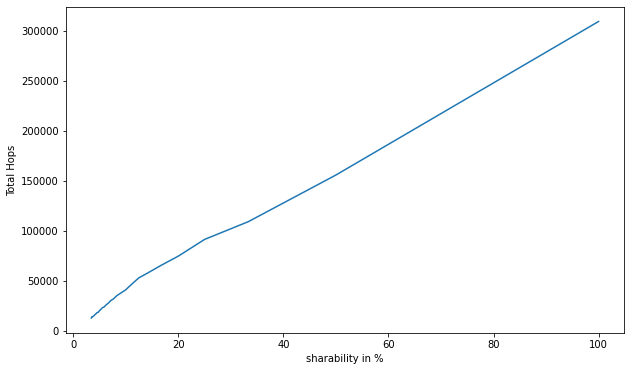

No of nodes=  100
Nearest neighbours=  34
Probability  0.5
Total iterations=  20
size of memory =  15
no of msgs 32


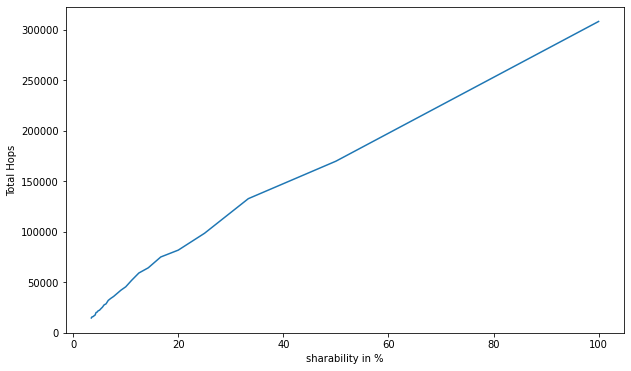

No of nodes=  100
Nearest neighbours=  39
Probability  0.5
Total iterations=  20
size of memory =  15
no of msgs 36


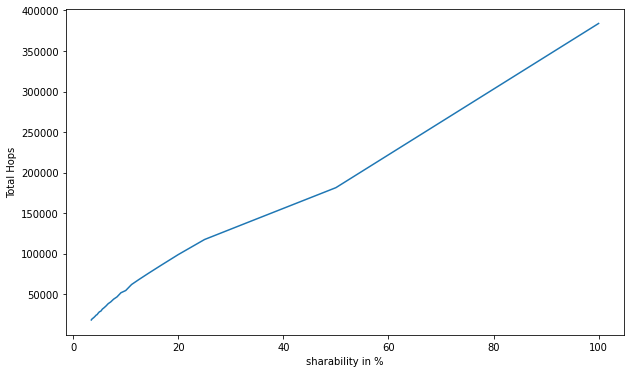

In [ ]:
nearest_neighbour=4
while(nearest_neighbour<=40):##graphs for different number of nearest neighbours
  Simulation_sharability_Vs_Total_Hops(100,nearest_neighbour,0.5,2,20,15) 
  nearest_neighbour+=5


No of nodes=  100
Nearest neighbours=  10
Probability  0.1
Total iterations=  20
size of memory =  15
no of msgs 30
11
6
6
7
8
8
10
6
6
4
6
6
6


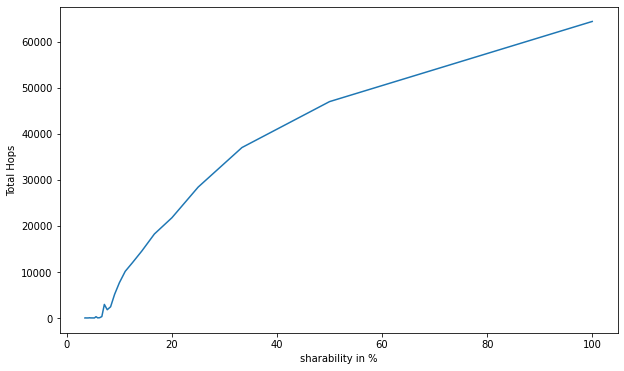

No of nodes=  100
Nearest neighbours=  10
Probability  0.30000000000000004
Total iterations=  20
size of memory =  15
no of msgs 33
18
6
13
7
9
6
5
6
8
8
4
5


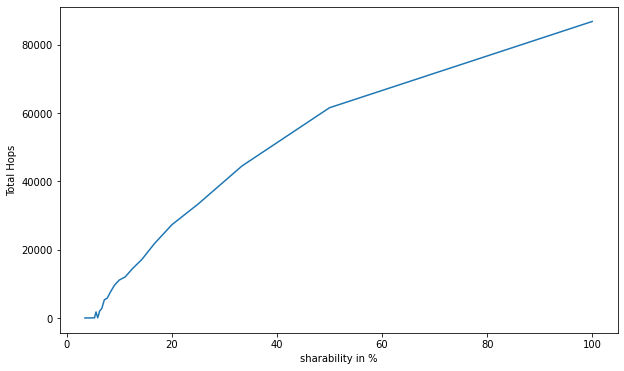

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  20
size of memory =  15
no of msgs 31
6
12
13
19
9
9
6
7
6
7
10
5


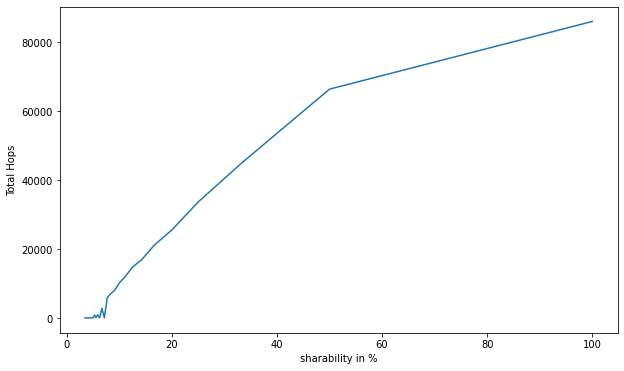

No of nodes=  100
Nearest neighbours=  10
Probability  0.7
Total iterations=  20
size of memory =  15
no of msgs 36
19
14
9
5
12
3
7
9
9
5
4
7


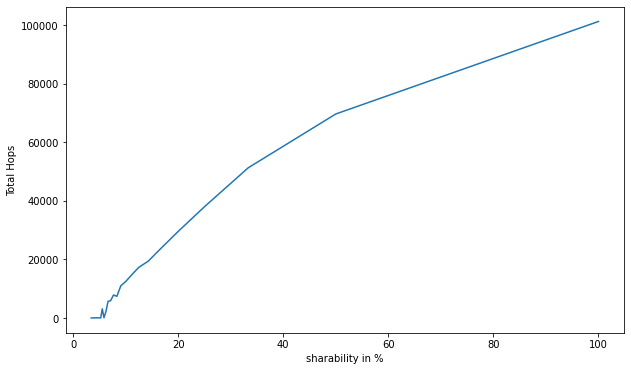

No of nodes=  100
Nearest neighbours=  10
Probability  0.8999999999999999
Total iterations=  20
size of memory =  15
no of msgs 35
10
6
8
16
9
5
7
6
5
6
7


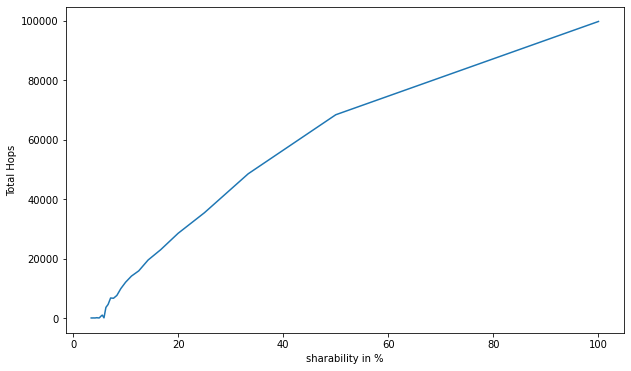

In [ ]:
probability_length=0.1
while(probability_length<=1):
  Simulation_sharability_Vs_Total_Hops(100,10,probability_length,2,20,15) 
  probability_length+=0.2


#Memory vs (total hops/iterations)

In [ ]:
def Memory_vs_totalHops_Calc(population,k,dict,iter,sharability):
  g=0
  x=[]
  y=[]
  next=[]
  cur=[]
  total=0
  for node in population:
    #print("here")
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
      next.append(node['index'])
  iteration=1
  while(iteration<=iter):
    #if(iteration%2==0):
     # print(iteration)
    cur=next
    next=[]
    if(len(cur)==0):
      print(iteration)
      break
    for el in cur:
      for msg in population[el]['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,el,next,sharability) 
        #print(total)
    
    
    #print(total)          
    #print(iteration)
    iteration+=1
  return (total/iteration) 

def Simulation_Memory_vs_totalHops(no_nodes,no_of_connected_components,p,percent,iter,sharability):
  population = gen_graph(no_nodes, no_of_connected_components, p,percent)
  g=0
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
  print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  #print("Size of memory= ",mem)
  print("Total iterations= ",iter)
  print("sharability = ",sharability)
 # avg
  m=0
  s=0
  dict={}
  for node in population:
    if(node['generator']==1):
      g=g+1
  dict=msgGeneration(population)
  print("no of msgs",g)
  for j in range(2,g+10):
    for node in population:
      node['memory']=[]
    if(j==4 or j==g//2 or j==g ):
      print(j)
    x.append(j)
    total=Memory_vs_totalHops_Calc(population,j,dict,iter,sharability)
    
    y.append(total)
  plotXY(x,y,"Memory given","Total Hops")
#population

#OBSERVATION

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  20
sharability =  2
no of msgs 32
4
16
32
7
7
7
7
6
6
7
6
6
6


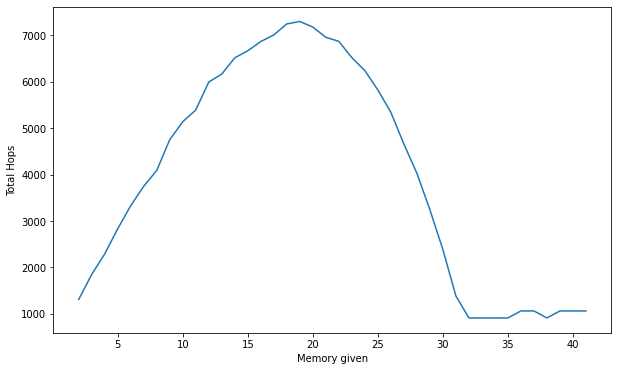

In [ ]:
Simulation_Memory_vs_totalHops(200,10,0.5,5,20,2) #msgs=48 p-length=0.5

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  1
no of msgs 11
4
5
11
4
4
4
4
4
4
4
4
4
4


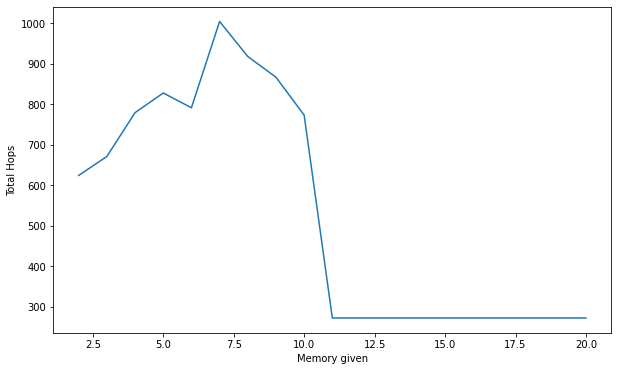

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  2
no of msgs 17
4
8
17
6
6
6
6
6
6
6
6
6
6


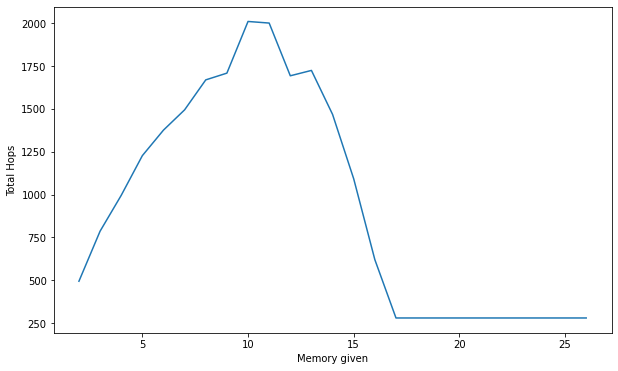

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  3
no of msgs 15
4
7
15
8
7
8
7
8
7
7
8
7
7


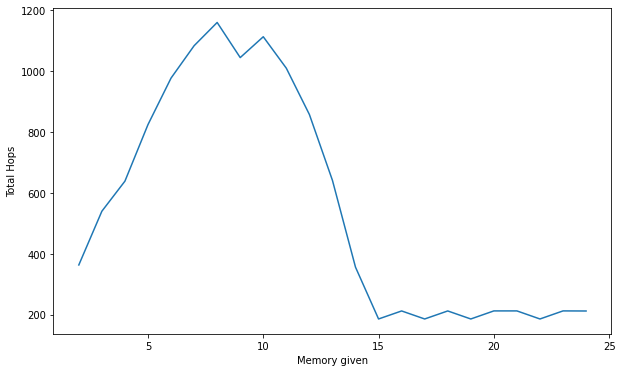

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  4
no of msgs 20
4
10
20
11
9
8
9
9
8
9
11
9
8


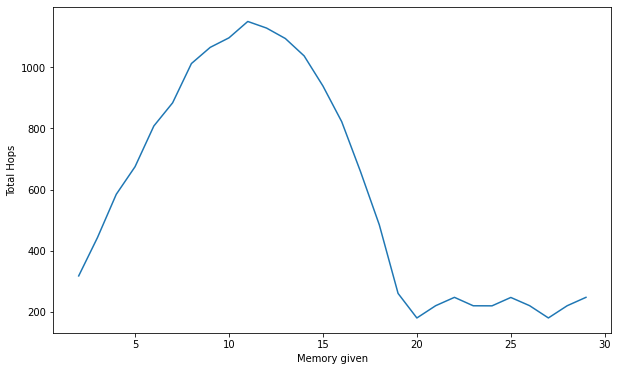

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  5
no of msgs 18
4
9
18
10
11
10
14
10
14
10
11
11
9


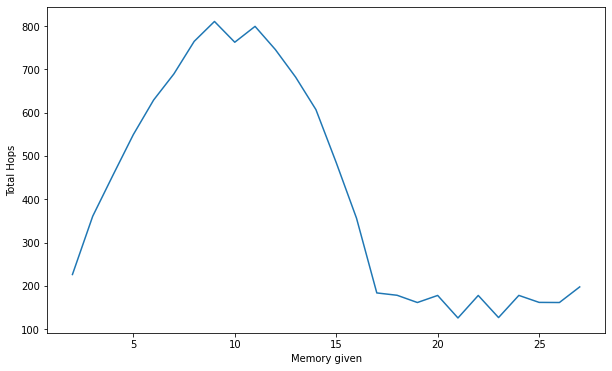

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  6
no of msgs 19
4
9
19
10
11
13
12
13
14
13
12
16
12


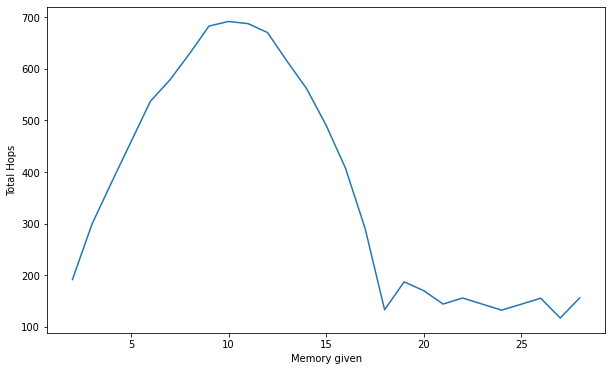

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  7
no of msgs 9
4
9
12
16
13
23
18
17
25
14
15
19


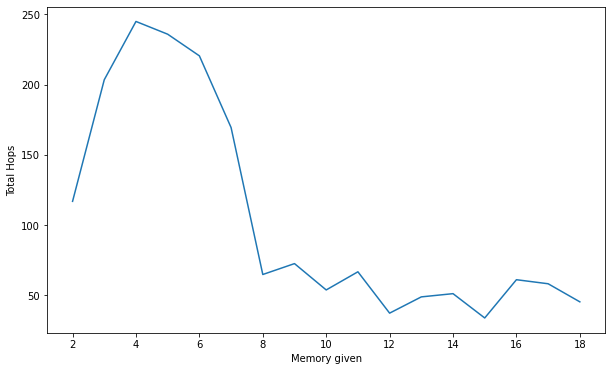

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  8
no of msgs 21
4
10
21
15
16
18
14
21
18
15
14
22
19


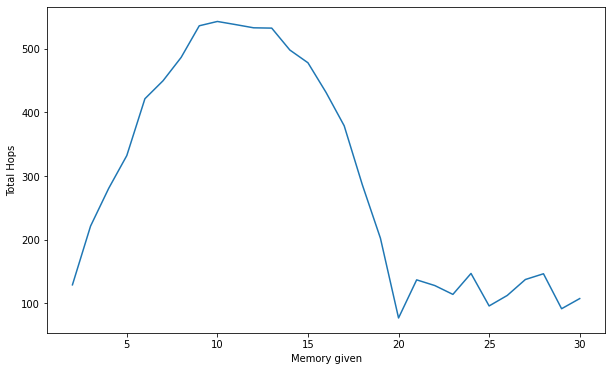

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  9
no of msgs 25
4
12
25
21
15
17
16
22
18
19
21
19
19


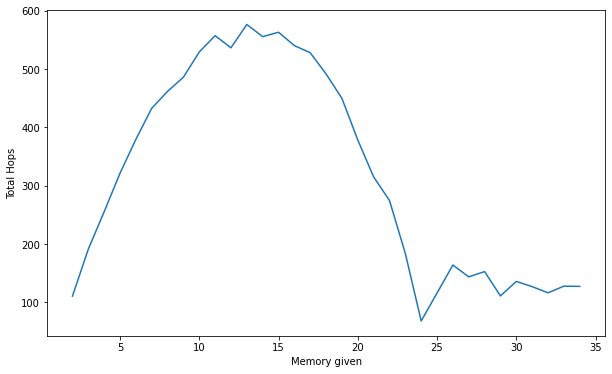

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  10
no of msgs 20
4
10
41
20
17
22
19
20
22
23
23
20
24
21


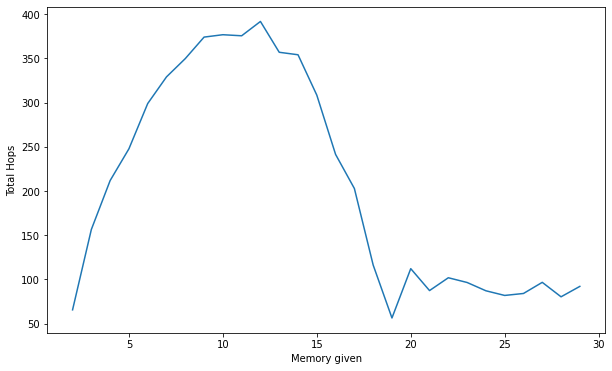

No of nodes=  100
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  11
no of msgs 16
4
8
47
16
24
31
27
31
27
30
24
31
22
27


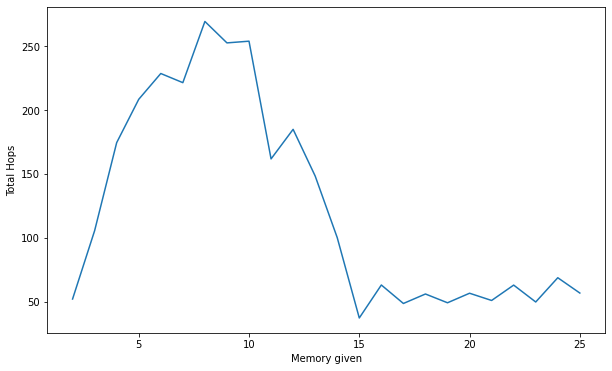

In [ ]:
for sharability in range(1,12): ## check how the curve is varying when the sharability is increased slowly
  Simulation_Memory_vs_totalHops(100,10,0.5,5,50,sharability) #msgs=48 p-length=0.5

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  1
no of msgs 31
4
15
31
5
5
5
5
5
5
5
5
5
5


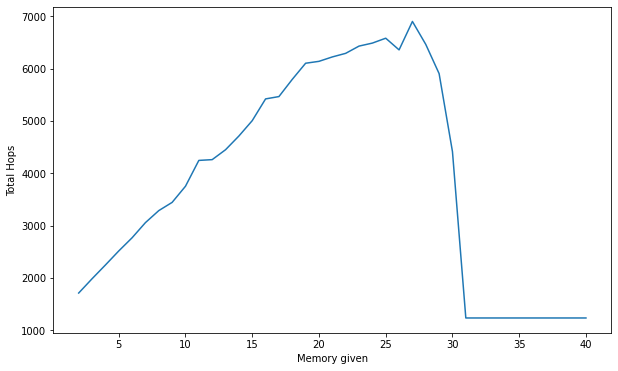

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  2
no of msgs 39
4
19
39
6
6
6
6
6
7
7
6
6
6


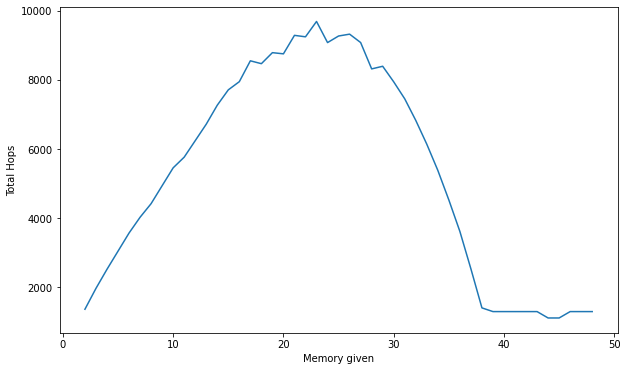

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  3
no of msgs 38
4
19
38
7
8
8
8
8
9
8
8
8
9


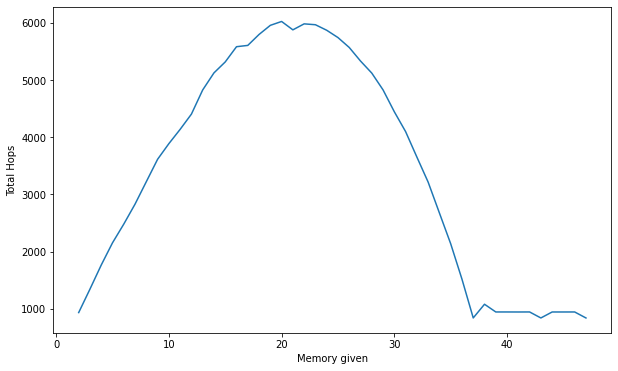

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  4
no of msgs 35
4
17
35
9
10
10
11
10
9
9
10
10
10


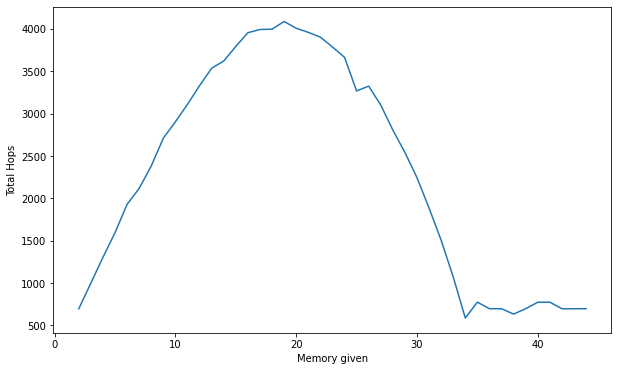

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  5
no of msgs 40
4
20
40
11
11
13
13
12
11
14
12
11
13


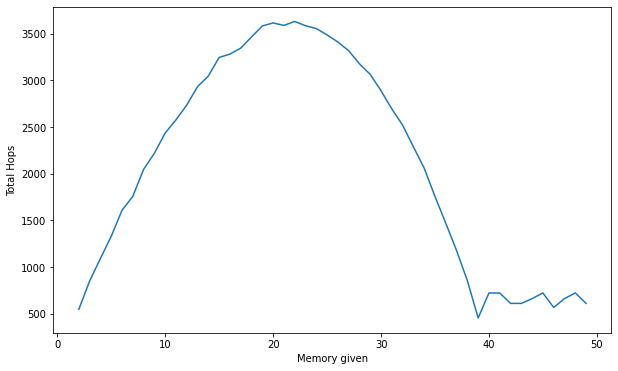

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  6
no of msgs 40
4
20
40
13
14
12
14
13
14
13
13
14
13


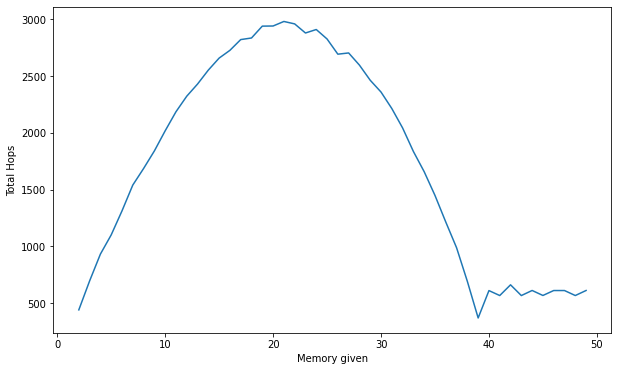

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  7
no of msgs 42
4
21
42
18
21
18
18
16
15
17
17
19
16


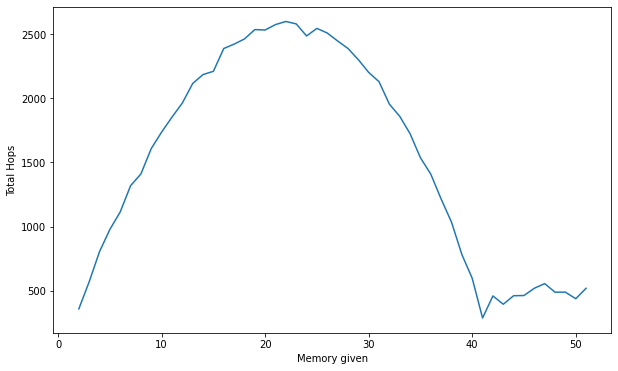

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  8
no of msgs 42
4
21
42
17
18
20
18
17
16
18
18
20
15


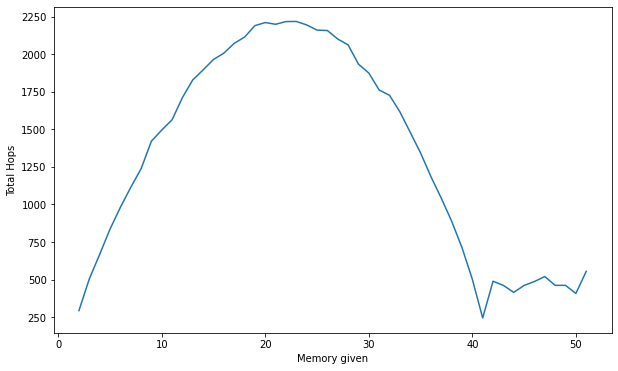

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  9
no of msgs 38
4
19
38
20
26
24
21
21
19
21
33
20
19


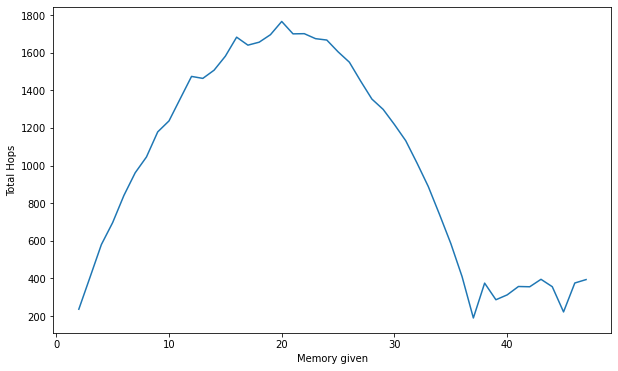

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  10
no of msgs 35
4
17
35
25
23
25
25
25
22
22
24
32
20


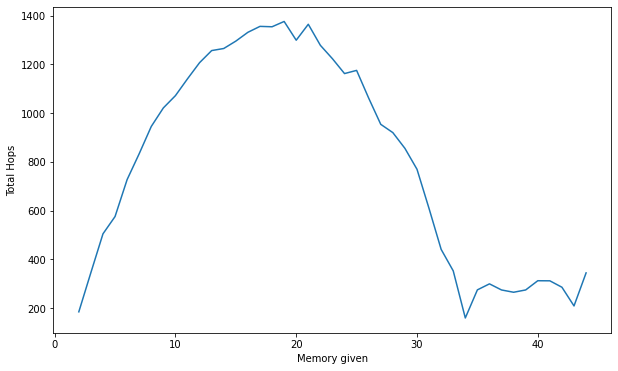

No of nodes=  200
Nearest neighbours=  10
Probability  0.5
Total iterations=  50
sharability =  11
no of msgs 38
4
19
41
38
31
31
28
25
25
22
33
24
23
25


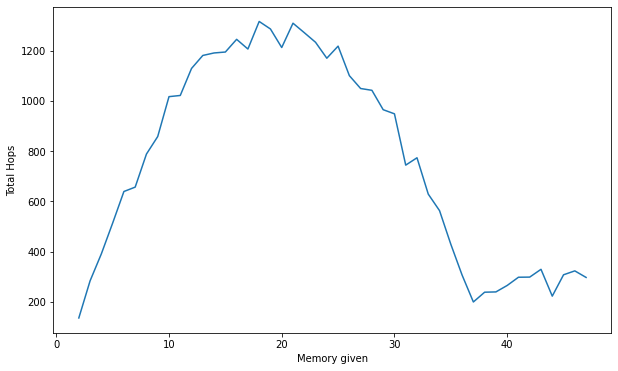

In [ ]:
for sharability in range(1,12): ## check how the curve is varying when the sharability is increased slowly
  Simulation_Memory_vs_totalHops(200,10,0.5,4,50,sharability) #msgs=48 p-length=0.5

#Total hops vs Nearest Neighbours

In [ ]:
def Nearest_Neighbour_Total_Hops_Calc(population,k,dict,iter,sharability):
  g=0
  x=[]
  y=[]
  next=[]
  cur=[]
  total=0
  for node in population:
    #print("here")
    if(node['generator']==1):
      g+=1
      node['memory'].append(node['mymsg'])
      next.append(node['index'])
  iteration=1
  while(iteration<=iter):
    #if(iteration%2==0):
     # print(iteration)
    cur=next
    next=[]
    if(len(cur)==0):
      print(iteration)
      break
    for el in cur:
      for msg in population[el]['memory']:
        total+= msg_Delivery_to_Adjacent_Nodes(msg,population,k,dict,el,next,sharability) 
        #print(total)
    
    
    #print(total)          
    #print(iteration)
    iteration+=1
  return (total) 

def Simulation_Nearest_Neighbour_Total_Hops(no_nodes,p,percent,iter,sharability,mem):
  
  x=[] ##g*n-1,g*n
  y=[]
  memory=[]
  print("No of nodes= ",no_nodes)
 # print("Nearest neighbours= ",no_of_connected_components)
  print("Probability ",p)
  #print("Size of memory= ",mem)
  print("Total iterations= ",iter)
  print("size of memory = ",mem)
 # avg
  m=0
  s=0
  dict={}
  no_of_connected_components=4
  while(no_of_connected_components<=2*mem):
    population = gen_graph(no_nodes, no_of_connected_components, p,percent)
    g=0
    for node in population:
      if(node['generator']==1):
        g=g+1
    dict=msgGeneration(population)
    #print("no of msgs",g)
    x.append(no_of_connected_components)
    total=Nearest_Neighbour_Total_Hops_Calc(population,mem,dict,iter,sharability)
    
    y.append(total)
    no_of_connected_components+=6
  plotXY(x,y,"no of nearest neighbours","Total Hops")
#population

#OBSERVATION

No of nodes=  100
Probability  0.5
Total iterations=  20
size of memory =  10


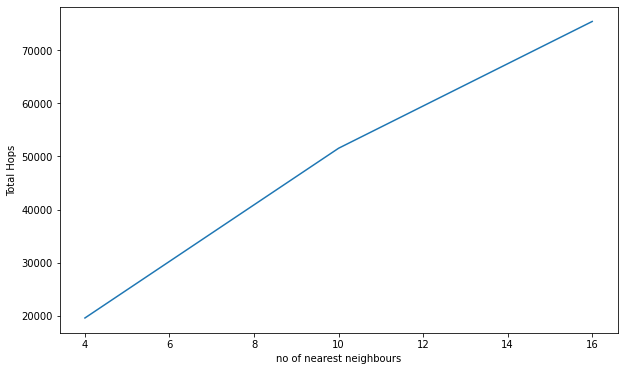

In [ ]:

Simulation_Nearest_Neighbour_Total_Hops(100,0.5,2,20,2,10) #msgs=48 p-length=0.5

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  5


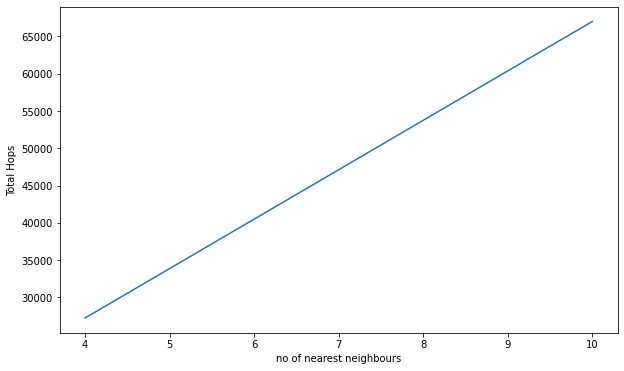

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  10


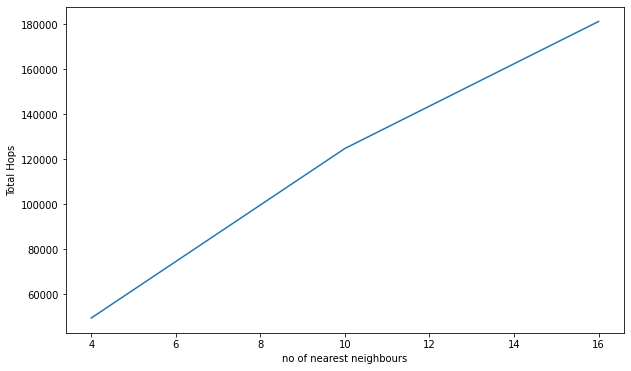

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  15


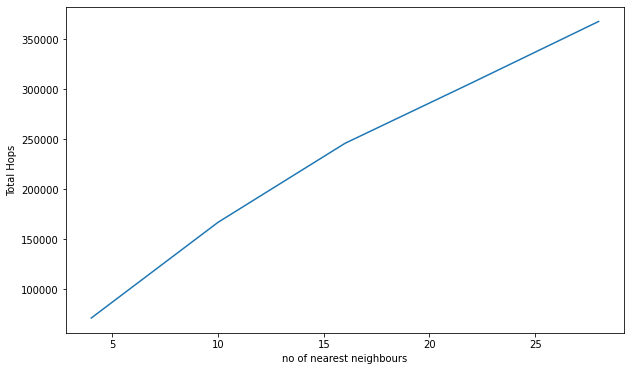

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  20


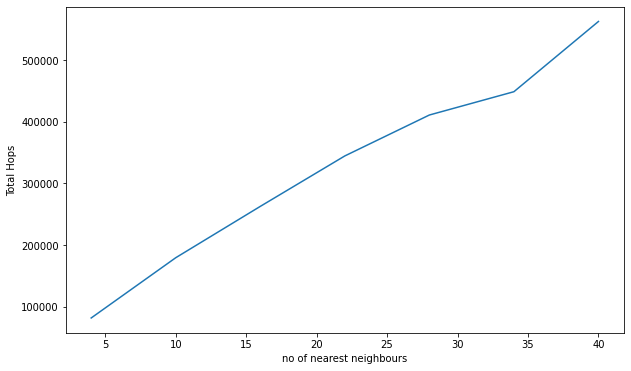

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  25
4
4


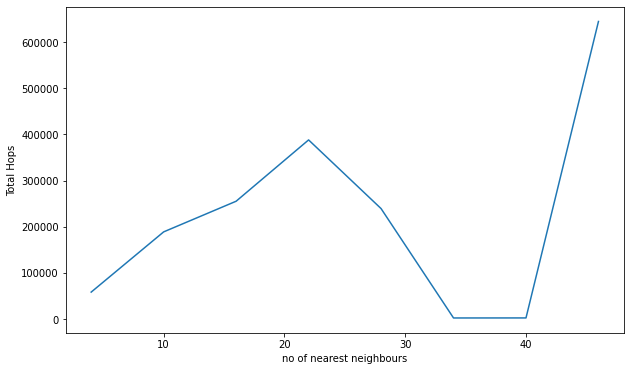

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  30
5


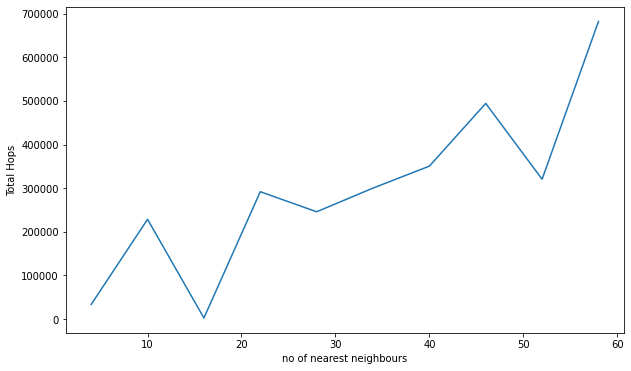

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  35
15
6
5
4
4
4
4
4
4
4
4


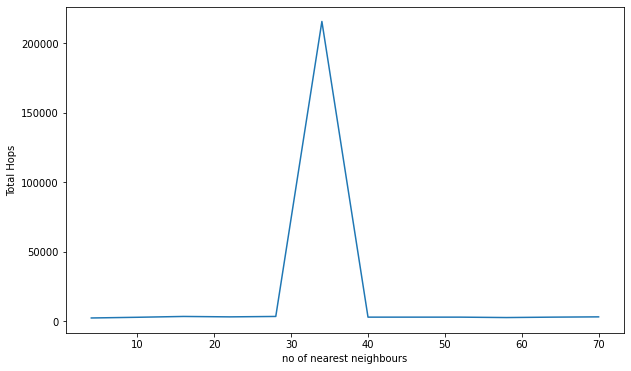

In [ ]:
memory=5
while(memory<=35):
  Simulation_Nearest_Neighbour_Total_Hops(100,0.5,2,50,2,memory) #msgs=48 p-length=0.5
  memory+=5

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  15


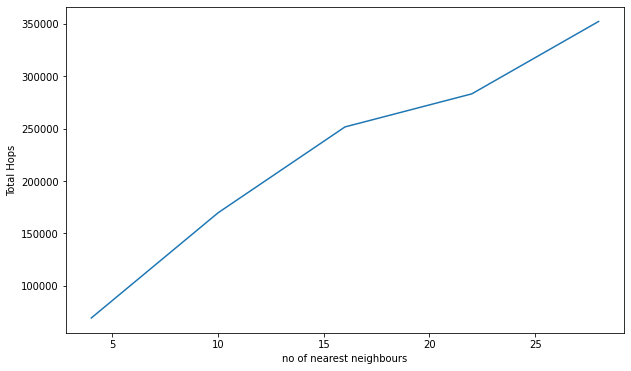

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  15


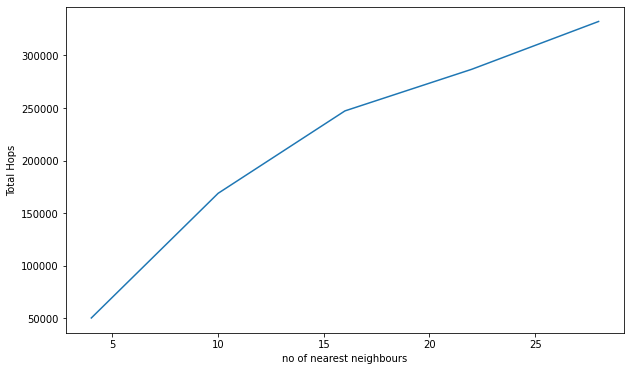

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  15


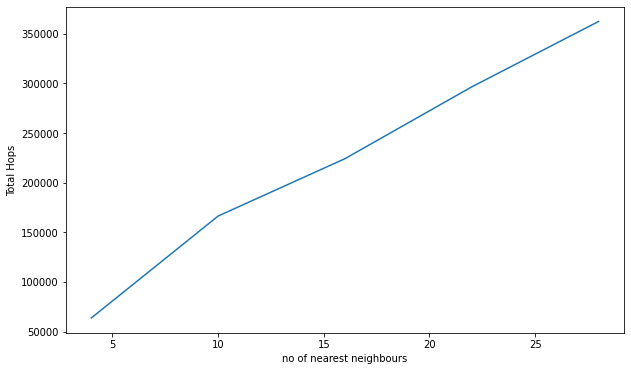

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  15


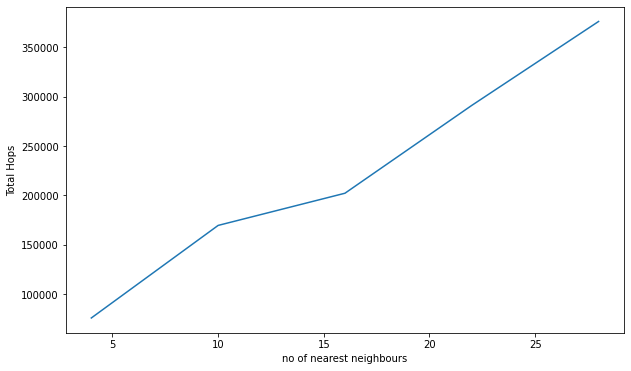

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  15


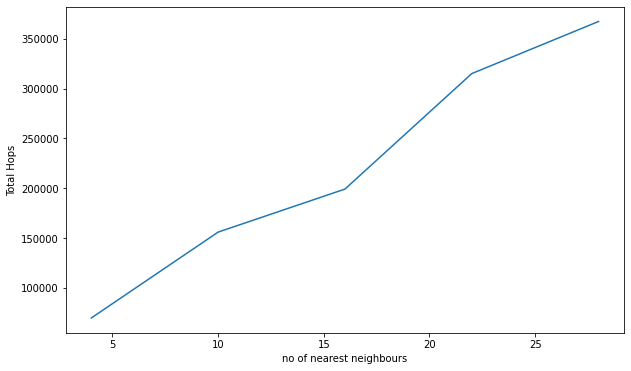

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  15


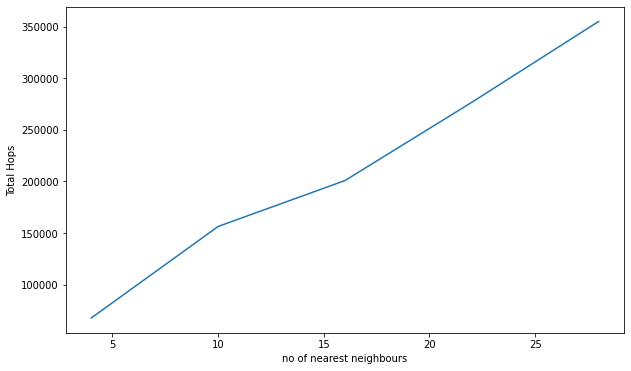

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  15


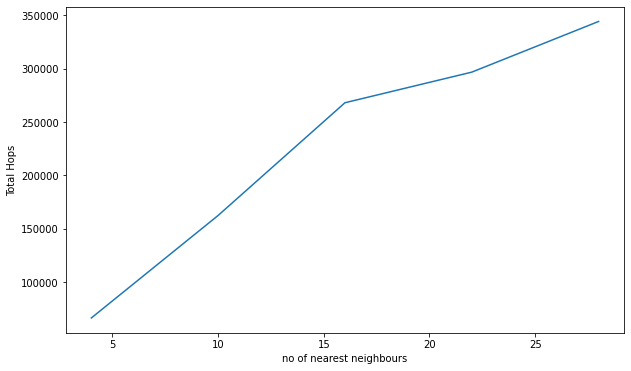

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  15


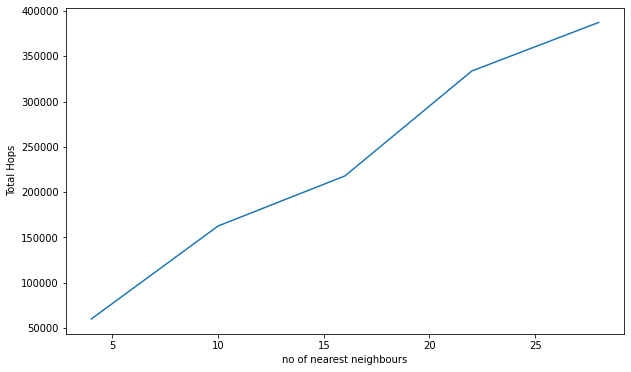

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  15


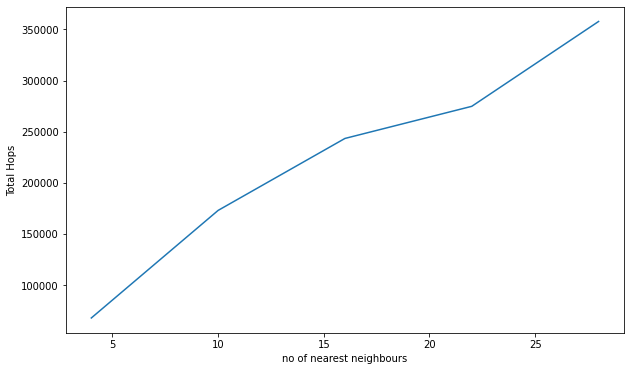

No of nodes=  100
Probability  0.5
Total iterations=  50
size of memory =  15


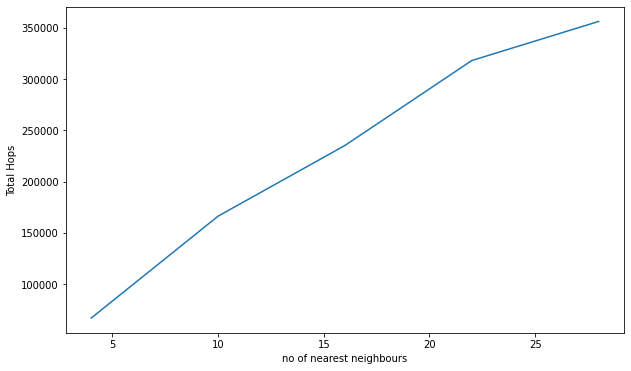

In [ ]:
sharability=1
while(sharability<=20):
  Simulation_Nearest_Neighbour_Total_Hops(100,0.5,2,50,2,15) #msgs=48 p-length=0.5
  sharability+=2